In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.express as px
from PIL import Image 
#fig.update_layout(template="plotly_white",title={'x': 0.5, 'xanchor': 'center'})

In [194]:
def set_plot_style():
    sns.set(style='whitegrid', palette='muted',font="SimHei", font_scale=1.2)
    #plt.figure(figsize=(10, 6))
    plt.xticks(rotation=45) 
    #plt.grid(True) 

In [87]:
#plt.rcParams.update({'figure.figsize': (10, 6), 'figure.dpi': 100})
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False

sns.set()
sns.set_theme(style="whitegrid")
colors = sns.color_palette() 
colors

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [5]:
colors_tab=(plt.cm.tab10.colors+plt.cm.tab20.colors)

In [102]:
df_1=pd.read_excel('data/patent_invest_2024_先进制造_医疗健康_3.xlsx',index_col=0)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172418 entries, 0 to 172417
Data columns (total 62 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   公司序号             172418 non-null  int64         
 1   公司简称             172418 non-null  object        
 2   工商全称             171909 non-null  object        
 3   成立时间             172418 non-null  datetime64[ns]
 4   公司简介             172418 non-null  object        
 5   省                172418 non-null  object        
 6   市                172397 non-null  object        
 7   行业               172418 non-null  object        
 8   子行业              172418 non-null  object        
 9   经度               172418 non-null  float64       
 10  纬度               172418 non-null  float64       
 11  估算估值             158944 non-null  float64       
 12  首次上市日期           38304 non-null   datetime64[ns]
 13  目前已上市            172418 non-null  int64         
 14  高科技企业            172418 n

In [12]:
df_2=pd.read_excel('data\先进制造企业_每年探索性专利.xlsx',index_col=0)
df_2.columns

Index(['Co', '申请年', 'explorative', 'jianjin_patent_num'], dtype='object')

In [14]:
#df=pd.merge(df,df_1,left_on=['工商全称','观察年'],right_on=['Co', '申请年'],how='left') #+先进制造企业

In [111]:
df_1['上市Days'].describe()

count     2686.000000
mean       856.444527
std       1950.780908
min          0.000000
25%          1.000000
50%          1.000000
75%        463.000000
max      11249.000000
Name: 上市Days, dtype: float64

In [23]:
df_1=df_1[df_1['目前已上市']==0]#初创企业
df_1.reset_index(drop=True,inplace=True)

In [ ]:
#当前法律状态:== '授权',字段没有导出,+公开类型

In [ ]:
#df_co['观察年']=成立年份--df_co['融资年份']--'申请日' range
# ['投资时间_Shift']=df_invest.groupby(['公司序号'])['投资时间'].transform(lambda x:x.fillna(method='ffill').shift(1))
# last_date = row.投资时间_Shift
# filter_value = co_value[(pd.isna(last_date)|(last_date <= co_value['申请日']))&(co_value['申请日'].dt.year <= row.观察年)]#'投资年','融资年份'
#(融资时间_last<='申请日'<融资时间 & (co_value['申请日'].dt.year <= 观察年))这一部分是累计的,上一次融资到观察年或观察年之前

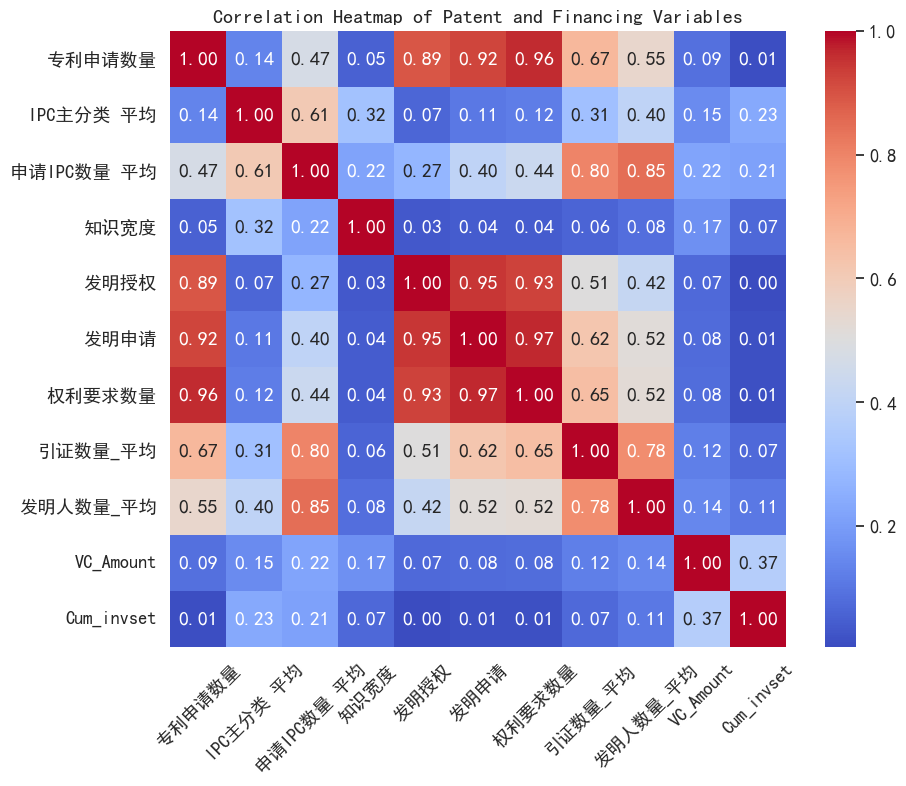

In [367]:
correlation_matrix = df_1[['Application_num', 'IPC主分类_平均', 'IPC_个数_平均','知识宽度', '发明授权', '发明申请','权利要求数量','引证数量_平均', '发明人数量_平均', 'VC_Amount', 'Cum_invset']].rename(columns={
    'Application_num':'专利申请数量','IPC主分类_平均':'IPC主分类 平均','IPC_个数_平均':'申请IPC数量 平均',
}).corr()
plt.figure(figsize=(10, 8))  # 设置图形大小
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Patent and Financing Variables')
plt.xticks(rotation=45) 
plt.show()

In [36]:
df_bridge=pd.read_csv('data\patent_bridge_last.csv',index_col=0)

In [37]:
df_bridge.shape

(9338426, 12)

In [24]:
co_0=pd.read_csv('data/先进制造上市企业.csv',index_col=0)
co_1=pd.read_excel('data/行业公司名简介_2024.xlsx',index_col=0)

In [40]:
co_0

,0
0,TCL中环新能源科技股份有限公司
1,TCL科技集团股份有限公司
2,七星电气股份有限公司
3,万马科技股份有限公司
4,三友联众集团股份有限公司
...,...
2779,黑龙江林海华安新材料股份有限公司
2780,黑龙江省发现者机器人股份有限公司
2781,齐峰新材料股份有限公司
2782,龙芯中科技术股份有限公司


In [26]:
co_1

,公司序号,公司简称,工商全称,公司简介,行业
0,0,SciXair空气净化器,天津蔚蓝科技有限公司,SciXair是一家空气净化器开发设计和销售服务商，目前主打产品为SciXair C1科学空...,传统制造
1,1,iKair家庭环境管家,北京超感时空科技有限公司,iKair家庭环境管家是一个专注于家庭室内环境监测的软硬件服务平台，提供模块式的检测仪帮助用...,传统制造
2,2,云印技术,云印技术（深圳）有限公司,云印技术专注包装产业的数字化商业价值探索，通过云计算、大数据、机器智能与包装工业的融合，以2...,传统制造
3,3,第一人居,第一摩码人居环境科技（北京）有限公司,第一人居是一家智能空气净化产品研发商，公司致力于为客户提供全流程人居环境解决方案。公司提供的...,传统制造
4,4,R2专业物品管理,上海合阖信息科技有限公司,R2专业物品管理是一家致力于信息化、数字化提供更高效管理、更轻松工作氛围的年轻科技企业。R2...,传统制造
...,...,...,...,...,...
25408,25505,连连数字,连连数字科技股份有限公司,跨境支付金融服务商,金融科技
25409,25507,快钱,快钱支付清算信息有限公司,互联网金融平台,金融科技
25410,25508,九次方大数据,九次方大数据信息集团有限公司,金融大数据服务平台,金融科技
25411,25509,平安医保科技,平安医疗健康管理股份有限公司,医保/商保管理平台,金融科技


In [453]:
co=set(co_0['0'].dropna())|set(co_1['工商全称'].dropna())|set(co_1['公司简称'])	
len(co)

50378

In [46]:
co_data=df_bridge['申请人'].str.split(';',expand=True).stack().str.strip().reset_index(level=1,drop=True).rename('Co')
co_data.isin(co).sum()

1917753

In [47]:
patent_mask=co_data.isin(co)
patent_co=df_bridge.loc[patent_mask[patent_mask].index]
patent_co['Co']=co_data[patent_mask]
patent_co['Co'].value_counts()

Co
珠海格力电器股份有限公司     98919
中兴通讯股份有限公司       85880
美的集团股份有限公司       70569
京东方科技集团股份有限公司    48646
海尔智家股份有限公司       27862
                 ...  
山西冀能青龙煤业有限公司         1
杭州龙旗科技有限公司           1
杭州全诊医学科技有限公司         1
江苏申命医疗科技有限公司         1
山东金泰集团股份有限公司         1
Name: count, Length: 16289, dtype: int64

In [51]:
patent_co[['序号','公开（公告）号','申请号','申请日','table','Co']]

,序号,公开（公告）号,申请号,申请日,table,Co
3,2260123,CN220710520U,CN202420403622.8,2024-03-04,patent202404,长安绿电科技有限公司
6,2260109,CN117812166A,CN202410236979.6,2024-03-01,patent202404,广州市仪美医用家具科技股份有限公司
7,2260107,CN117811645A,CN202410234783.3,2024-03-01,patent202404,南京控维通信科技有限公司
9,2260111,CN117807937A,CN202410236395.9,2024-03-01,patent202404,重庆鹰谷光电股份有限公司
10,2260104,CN117801110A,CN202410231409.8,2024-03-01,patent202404,北京纳百生物科技有限公司
...,...,...,...,...,...,...
9337996,181,CN2201504Y,CN94219339.3,1994-08-31,patent202210,珠海格力电器股份有限公司
9338012,166,CN3033993D,CN94307060.0,1994-07-16,patent202210,山东鲁抗医药股份有限公司
9338030,152,CN1104887A,CN94110662.4,1994-06-14,patent202210,山东鲁抗医药股份有限公司
9338057,131,CN1094440A,CN94110539.3,1994-04-14,patent202210,山东金泰集团股份有限公司


In [59]:
patent_co.groupby('申请号')['公开（公告）号'].nunique().sort_values()

申请号
CN00100408.5        1
CN202110030735.9    1
CN202110030695.8    1
CN202110030694.3    1
CN202110030680.1    1
                   ..
CN200710079480.5    3
CN201210040992.1    3
CN202210425987.6    3
CN202110142856.2    3
CN201810384827.5    3
Name: 公开（公告）号, Length: 1686922, dtype: int64

In [55]:
patent_co[['公开（公告）号','申请号','table']].drop_duplicates().to_csv('data\目标企业专利_bridge.csv')

In [ ]:
tb_id=data.groupby('table')['申请号'].apply(lambda x:x.to_list())
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [7]:
columns=['序号', '标题 (中文)', '摘要 (中文)','申请人','申请日','申请号','首次公开日','公开（公告）号',
         '专利类型', '专利有效性',
         '公开国别','IPC主分类','IPC','申请人类型','发明人','发明人数量',
         '简单同族','扩展同族','简单同族个数',
         '引证专利','引证科技文献','引证次数','被引证次数','引证申请人','被引证申请人',
         '申请人数量','许可次数','转让次数','权利要求数量','当前法律状态','公开类型']
column_name = '`'+'`,`'.join(columns)+'`'
column_name

'`序号`,`标题 (中文)`,`摘要 (中文)`,`申请人`,`申请日`,`申请号`,`首次公开日`,`公开（公告）号`,`专利类型`,`专利有效性`,`公开国别`,`IPC主分类`,`IPC`,`申请人类型`,`发明人`,`发明人数量`,`简单同族`,`扩展同族`,`简单同族个数`,`引证专利`,`引证科技文献`,`引证次数`,`被引证次数`,`引证申请人`,`被引证申请人`,`申请人数量`,`许可次数`,`转让次数`,`权利要求数量`,`当前法律状态`'

In [ ]:
batch_size=5000
for table in tb_id.index:
    query = text(f'SELECT {column_name} FROM `{table}` WHERE `申请号` in :ids')
    chunks_list = []
    ids = tuple(tb_id[table])
    for batch in chunks(ids, batch_size):
        chunk = pd.read_sql_query(query, con=engine, params={'ids': batch})
        chunks_list.append(chunk)
        print(len(chunks_list),chunk.shape[0])
        del chunk
    df_filter = pd.concat(chunks_list, ignore_index=True)
    df_filter['table_name']=table
    df_filter.to_pickle(f'data\\patent_{table}.pkl')
    print(table,df_filter.shape)
    del df_filter
    del chunks_list

In [385]:
%%time
names=['patent_incopat_202101_202211','patent_incopat_202212_202312','patent202210','patent202309','patent202404']
df_filter=pd.DataFrame()
for n in names:
    df=pd.read_pickle(f'X:\Downloads\Patent\patent_{n}.pkl')
    df_filter=pd.concat([df_filter,df])
    print(n,df.shape)

patent_incopat_202101_202211 (305146, 31)
patent_incopat_202212_202312 (31331, 31)
patent202210 (571234, 31)
patent202309 (29529, 31)
patent202404 (1177610, 31)
CPU times: total: 16.5 s
Wall time: 2min 57s


In [386]:
df_filter.shape

(2114850, 31)

In [387]:
%%time
names=['patent_incopat_202101_202211','patent_incopat_202212_202312','patent202210','patent202309','patent202404']
df_filter_1=pd.DataFrame()
for n in names:
    df_filter_1=pd.concat([df_filter_1,pd.read_pickle(f'X:\Downloads\Patent\patent_{n}_1.pkl')])
    print(n,df_filter_1.shape)

patent_incopat_202101_202211 (305146, 8)
patent_incopat_202212_202312 (336477, 8)
patent202210 (907711, 8)
patent202309 (937240, 8)
patent202404 (2114850, 8)
CPU times: total: 2.61 s
Wall time: 17.4 s


In [374]:
df_filter_1.columns

Index(['序号', '申请人', '申请日', '申请号', '首次公开日', '公开（公告）号', '公开类型', 'table_name'], dtype='object')

In [389]:
df_filter=pd.concat([df_filter,df_filter_1['公开类型']],axis=1)

In [390]:
df_filter['申请日']=pd.to_datetime(df_filter['申请日'])
df_filter.sort_values(['申请日','公开类型'],ascending=False,inplace=True)

In [392]:
df_filter.drop_duplicates(['申请号','公开（公告）号'],keep='first',inplace=True)
df_filter.reset_index(drop=True,inplace=True)
df_filter.shape#1917753

(1927613, 32)

In [393]:
df_filter.columns

Index(['序号', '标题 (中文)', '摘要 (中文)', '申请人', '申请日', '申请号', '首次公开日', '公开（公告）号',
       '专利类型', '专利有效性', '公开国别', 'IPC主分类', 'IPC', '申请人类型', '发明人', '发明人数量',
       '简单同族', '扩展同族', '简单同族个数', '引证专利', '引证科技文献', '引证次数', '被引证次数', '引证申请人',
       '被引证申请人', '申请人数量', '许可次数', '转让次数', '权利要求数量', '当前法律状态', 'table_name',
       '公开类型'],
      dtype='object')

In [394]:
df_filter.dtypes

序号                     int64
标题 (中文)               object
摘要 (中文)               object
申请人                   object
申请日           datetime64[ns]
申请号                   object
首次公开日         datetime64[ns]
公开（公告）号               object
专利类型                  object
专利有效性                 object
公开国别                  object
IPC主分类                object
IPC                   object
申请人类型                 object
发明人                   object
发明人数量                float64
简单同族                  object
扩展同族                  object
简单同族个数                 int64
引证专利                  object
引证科技文献                object
引证次数                 float64
被引证次数                 object
引证申请人                 object
被引证申请人                object
申请人数量                float64
许可次数                  object
转让次数                  object
权利要求数量               float64
当前法律状态                object
table_name            object
公开类型                  object
dtype: object

In [395]:
df_filter['公开类型'].isna().sum()

193550

In [398]:
df_filter['公开类型'].value_counts()

公开类型
发明申请        706634
实用新型        560796
发明授权        332380
外观设计        134022
修正或者更正专利       197
译文              34
Name: count, dtype: int64

In [396]:
df_filter.loc[df_filter['table_name']=='patent202404','公开类型'].isna().sum(),df_filter.loc[df_filter['table_name']=='patent202210','公开类型'].isna().sum()

(0, 0)

In [397]:
df_filter.loc[df_filter['table_name']=='patent_incopat_202212_202312','公开类型'].isna().sum()#incopat部分缺失

27289

In [399]:
df_filter.to_csv('data\patent_1927_16k_202403_last.csv')

In [401]:
co_data=df_filter['申请人'].str.split(';',expand=True).stack().str.strip().reset_index(level=1,drop=True).rename('工商全称')
len(co_data)

2354634

In [402]:
patent_co=pd.merge(co_data, df_filter, left_index=True, right_index=True)
patent_co.shape

(2354634, 33)

In [42]:
co_1['行业'].replace('金融科技','金融',inplace=True)

In [43]:
co_1.groupby('工商全称')['行业'].nunique().sort_values()

工商全称
8 Securities Limited    1
浙江众鑫环保科技集团股份有限公司        1
浙江众星志连科技有限责任公司          1
浙江众成包装材料股份有限公司          1
浙江众凌科技有限公司              1
                       ..
中科驭数（北京）科技有限公司          2
毫厘科技（常州）有限公司            2
北京佳格天地科技有限公司            2
上海智臻智能网络科技股份有限公司        2
重庆小爱科技有限公司              2
Name: 行业, Length: 25068, dtype: int64

In [38]:
tmp=co_1.groupby('工商全称')['公司序号'].nunique().sort_values()
tmp

工商全称
8 Securities Limited    1
浙江九川竹木股份有限公司            1
浙江九合环境股份有限公司            1
浙江乐普药业股份有限公司            1
浙江乐享齐方环保科技有限公司          1
                       ..
上海爱海斯信息技术有限公司           3
杭州融都科技股份有限公司            3
鑫涌算力信息科技（上海）有限公司        3
上海格平信息科技有限公司            3
北京钱景基金销售有限公司            3
Name: 公司序号, Length: 25068, dtype: int64

In [40]:
(tmp>1).sum()

212

In [34]:
co_1.query('工商全称=="上海格平信息科技有限公司"')

,公司序号,公司简称,工商全称,公司简介,行业
18771,18771,博医帮,上海格平信息科技有限公司,博医帮是一个基于移动互联网的糖尿病远程管理服务平台及移动应用，提供血糖监测、糖尿病教育、饮食...,医疗健康
18772,18772,格平科技,上海格平信息科技有限公司,上海格平科技专注于移动互联网在医疗健康行业的应用，目前主打产品为糖尿病应用糖尿病管理软件，旗...,医疗健康
18936,18936,微糖,上海格平信息科技有限公司,微糖初创团队于2013年成立，原名博医帮，2014年更名为微糖。\n微糖是专业的糖尿病全程管...,医疗健康


In [403]:
patent_co=patent_co.merge(co_1[['工商全称','行业']].drop_duplicates(),on='工商全称',how='left')
patent_co.shape

(2358902, 34)

In [404]:
patent_co['行业'].value_counts()

行业
先进制造    1203178
传统制造     429433
医疗健康     211092
金融        78257
Name: count, dtype: int64

In [405]:
patent_co['申请年']=patent_co['申请日'].dt.year

In [408]:
co_2=pd.read_excel('data/STK_LISTEDCOINFOANL.xlsx',skiprows=[0,2])
co_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58346 entries, 0 to 58345
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   股票代码      58346 non-null  int64  
 1   股票简称      58346 non-null  object 
 2   统计截止日期    58346 non-null  object 
 3   上市公司ID    58346 non-null  int64  
 4   证券ID      58346 non-null  int64  
 5   行业名称      58346 non-null  object 
 6   行业代码      58346 non-null  object 
 7   行业名称C     58346 non-null  object 
 8   行业代码C     58346 non-null  object 
 9   注册具体地址    58346 non-null  object 
 10  公司办公地址    58346 non-null  object 
 11  办公地址邮政编码  58324 non-null  object 
 12  董事会秘书     58274 non-null  object 
 13  董秘联系电话    58272 non-null  object 
 14  董秘传真      57964 non-null  object 
 15  董秘电子邮箱    57913 non-null  object 
 16  证券事务代表    47972 non-null  object 
 17  统一社会信用代码  44099 non-null  object 
 18  重大变更      55144 non-null  object 
 19  办公地经度     58079 non-null  float64
 20  办公地纬度     58079 non-null  fl

In [411]:
co_2['首次上市日期']=pd.to_datetime(co_2['首次上市日期'])

In [410]:
co_11=pd.read_excel('data/公司融资数据整理修正-20240301.xlsx',index_col=0)
co_11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47920 entries, 0 to 47919
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   公司简称      47920 non-null  object        
 1   工商全称      47758 non-null  object        
 2   成立时间      47920 non-null  object        
 3   公司简介      47918 non-null  object        
 4   省         47920 non-null  object        
 5   市         47914 non-null  object        
 6   行业        47920 non-null  object        
 7   子行业       47920 non-null  object        
 8   融资时间      47719 non-null  datetime64[ns]
 9   轮次        47719 non-null  object        
 10  金额        47719 non-null  object        
 11  币种        47719 non-null  object        
 12  等值人民币（万）  47477 non-null  float64       
 13  投资机构      35456 non-null  object        
 14  估算估值      23499 non-null  float64       
 15  行业序号      47920 non-null  int64         
 16  简称_全称     25155 non-null  object        
 17  公司序号      47920 n

In [412]:
co_21=co_2[['中文全称','首次上市日期']].drop_duplicates(['中文全称','首次上市日期'],keep='first')
co_11=pd.merge(co_11,co_21, left_on=['工商全称'],right_on=['中文全称'],how='left')#,'融资时间'
del co_11['中文全称']

In [414]:
mask=co_11['首次上市日期'].isna()&(co_11.轮次=='IPO上市')
co_11.loc[mask,'首次上市日期']=co_11.loc[mask,'融资时间']#按照IPO上市融资时间计算

In [415]:
mask2=co_11.公司序号.isin(co_11[mask].公司序号)
co_11.loc[mask2,'首次上市日期']=co_11[mask2].groupby('公司序号',sort=False)['首次上市日期'].fillna(method='bfill',axis=0)

In [421]:
co_3=co_11.loc[~co_11['首次上市日期'].isna(),['工商全称','首次上市日期']].drop_duplicates()
co_3

,工商全称,首次上市日期
61,威创集团股份有限公司,2009-11-27
75,慧居科技股份有限公司,2023-07-10
85,中海油能源发展股份有限公司,2019-06-26
91,上海姚记科技股份有限公司,2011-08-05
99,中持水务股份有限公司,2017-03-14
...,...,...
47534,重庆智飞生物制品股份有限公司,2010-09-28
47590,杭州民生健康药业股份有限公司,2023-09-05
47699,兰州佛慈制药股份有限公司,2011-12-22
47710,无锡药明合联生物技术有限公司,2023-11-17


In [422]:
patent_co=patent_co.merge(co_3,on='工商全称',how='left')

In [425]:
patent_co.loc[patent_co['首次上市日期'].isna(),'工商全称'].isin(co_2['中文全称']).sum()#不在目标名单内

3812

In [436]:
mask=patent_co['首次上市日期'].isna()&patent_co['工商全称'].isin(co_2['中文全称'])
patent_co.loc[mask,'首次上市日期']=co_21.set_index('中文全称').loc[patent_co.loc[mask,'工商全称']].values

In [439]:
patent_co.groupby('工商全称').首次上市日期.any().sum()

3068

In [445]:
co_111=co_11[['工商全称','行业','子行业']].drop_duplicates(['工商全称','行业'])
patent_co=patent_co.merge(co_111,on=['工商全称','行业'],how='left')
patent_co.shape#1927613...

(2373472, 37)

In [450]:
patent_co.count()

工商全称          2373472
序号            2373472
标题 (中文)       2373472
摘要 (中文)       2366223
申请人           2373472
申请日           2373472
申请号           2373472
首次公开日         2373375
公开（公告）号       2373472
专利类型          2373472
专利有效性         2373472
公开国别          2373472
IPC主分类        2197256
IPC           2197282
申请人类型         2363756
发明人           2373002
发明人数量         2372911
简单同族          2373472
扩展同族          2373472
简单同族个数        2373472
引证专利           958178
引证科技文献         228914
引证次数           958178
被引证次数          713100
引证申请人          956927
被引证申请人         712494
申请人数量         2373469
许可次数            13248
转让次数           134210
权利要求数量        2190973
当前法律状态        2373472
table_name    2373472
公开类型          2131945
行业            1936530
申请年           2373472
首次上市日期        1140395
子行业           1913678
dtype: int64

扩展后一部分不在名单的...否有33k企业

In [455]:
patent_co=patent_co[patent_co['工商全称'].isin(co)]
patent_co.shape

(1936591, 37)

In [456]:
patent_co.工商全称.nunique()

16289

In [457]:
patent_co.to_csv('data\patent_co_1936_16k_202403.csv')

In [464]:
(patent_co['申请日']<patent_co['首次上市日期']).sum(),(patent_co['申请日']>patent_co['首次上市日期']).sum()

(236667, 900815)

In [461]:
(patent_co['首次公开日']<patent_co['首次上市日期']).sum()

195399

In [462]:
(patent_co['首次上市日期'].isna() | (patent_co['申请日']<=patent_co['首次上市日期'])|(patent_co['首次公开日']<=patent_co['首次上市日期'])).sum()

1035776

In [572]:
patent_co.行业.isna().sum(),patent_co.子行业.isna().sum()

(61, 22913)

In [590]:
patent_co.groupby('行业').工商全称.nunique()

行业
传统制造    4558
先进制造    7371
医疗健康    3613
金融       750
Name: 工商全称, dtype: int64

In [584]:
mask=(patent_co.行业=='金融')&(~patent_co.工商全称.isin(co_11.loc[co_11.行业=='金融','工商全称']))
mask.sum()

22366

In [586]:
patent_co.loc[mask,'子行业']='金融科技'

In [587]:
df=patent_co[(patent_co['首次上市日期'].isna() | (patent_co['申请日']<=patent_co['首次上市日期'])|(patent_co['首次公开日']<=patent_co['首次上市日期'])) & (patent_co.行业!='传统制造')]
df.shape

(758384, 37)

In [588]:
df.工商全称.nunique()

11406

In [589]:
df.to_csv('data\patent_co_758_11k_202403.csv')

In [591]:
df.groupby('行业').工商全称.nunique()

行业
先进制造    7197
医疗健康    3534
金融       676
Name: 工商全称, dtype: int64

In [471]:
application_num=df.groupby(['行业','申请年'],as_index=False).申请号.nunique().rename(columns={'申请号': '申请数量'})
authorized_counts=df.groupby(['行业','申请年'],as_index=False)['当前法律状态'].apply(lambda x: (x == '授权').sum()).rename(columns={'当前法律状态': '授权数量'})
industry_year_patent=pd.merge(application_num, authorized_counts, on=['行业', '申请年'],how='outer')
industry_year_patent

,行业,申请年,申请数量,授权数量
0,先进制造,1994,4,0
1,先进制造,1995,1,0
2,先进制造,1996,5,0
3,先进制造,1998,4,0
4,先进制造,1999,32,0
...,...,...,...,...
77,金融,2020,6747,4007
78,金融,2021,7449,3090
79,金融,2022,6675,1619
80,金融,2023,3895,798


本部分类似于论文的描述性统计模块，样本选取自先进制造、医疗健康、金融科技行业三大行业的初创企业。

# 初创企业日期还得,当前时间点未上市，剔除样本

C:\Users\Prime\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Prime\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


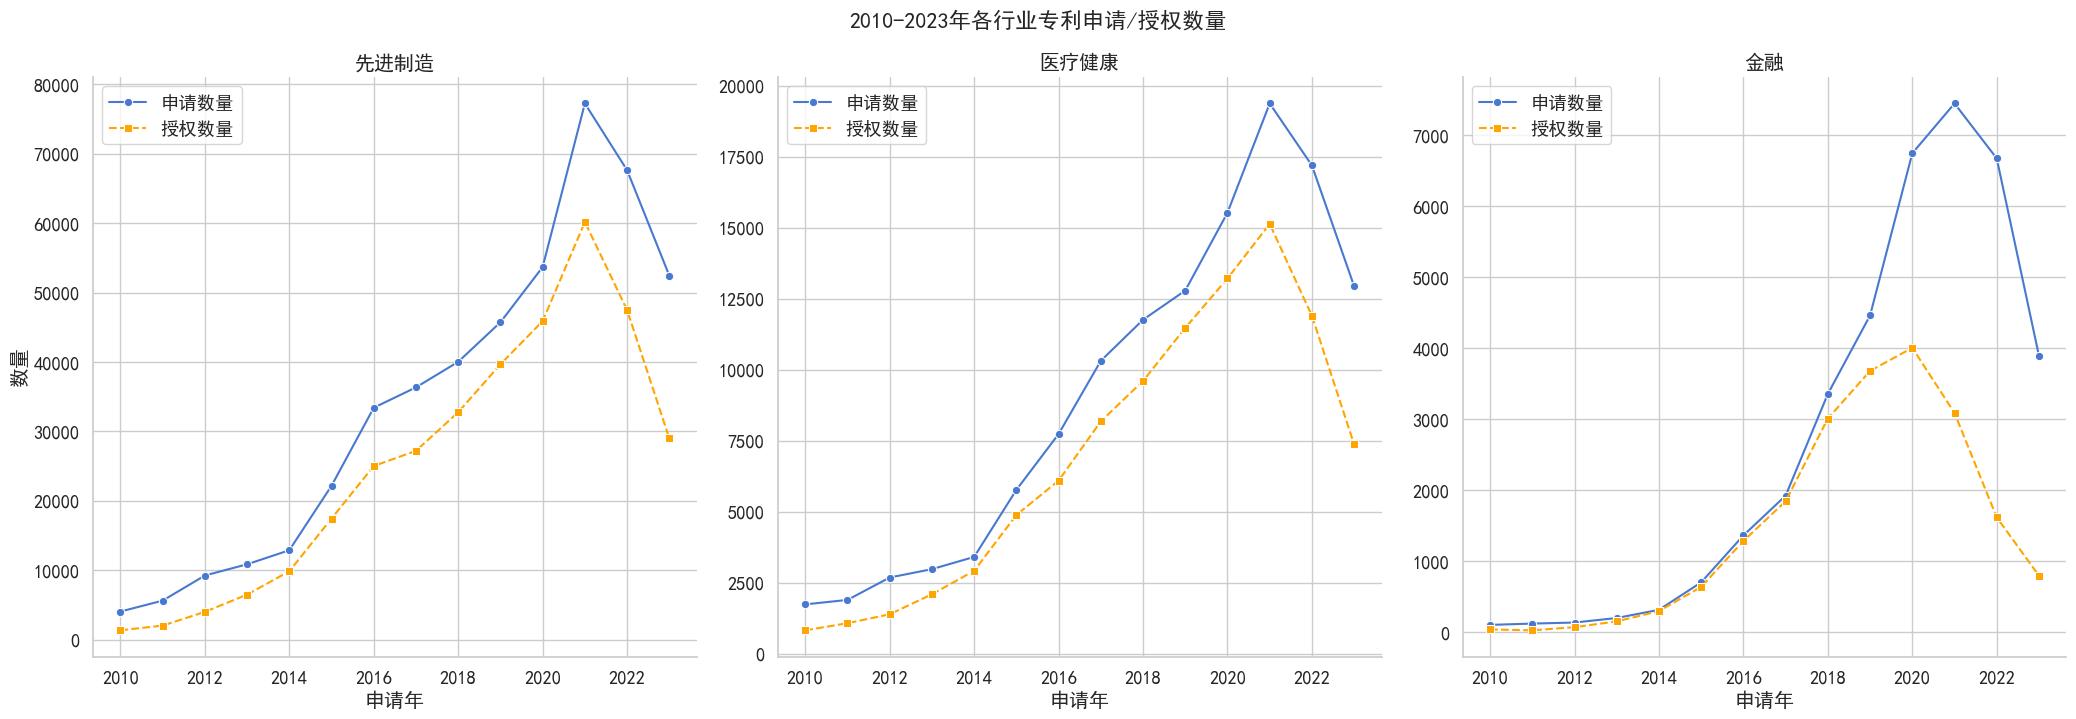

In [476]:
data=industry_year_patent[(industry_year_patent.申请年<2024)&(industry_year_patent.申请年>=2010)].reset_index(drop=True)
#set_plot_style()
sns.set(style='whitegrid', palette='muted',font="SimHei", font_scale=1.2) 
# FacetGrid创建子图
g = sns.FacetGrid(data, col='行业', col_wrap=3, height=7,  sharey=False)#aspect=1.5,

g.map_dataframe(sns.lineplot, x='申请年', y='申请数量', marker='o', linestyle='-', label='申请数量')
g.map_dataframe(sns.lineplot, x='申请年', y='授权数量', marker='s', linestyle='--', label='授权数量',color='orange')

# 添加数据标签
# def add_labels(data, **kwargs):
#     for i in range(data.shape[0]):
#         plt.text(data['申请年'].iloc[i], data['申请数量'].iloc[i], data['申请数量'].iloc[i], ha='center', va='bottom')
#         plt.text(data['申请年'].iloc[i], data['授权数量'].iloc[i], data['授权数量'].iloc[i], ha='center', va='bottom')

# #g.map_dataframe(add_labels)

for ax in g.axes.flat:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[:2], labels=['申请数量', '授权数量'])

# 设置标题和标签
g.set_axis_labels('申请年', '数量')
g.set_titles(col_template="{col_name}", fontsize=14)

plt.suptitle('2010-2023年各行业专利申请/授权数量', y=1.03, fontsize=16)
plt.show()

表1a：2010年至今三个行业初创企业累计专利申请数量的均值、中位数和方差  
表1b：2010年至今三个行业初创企业累计专利授权数量的均值、中位数和方差  

In [477]:
data=industry_year_patent[industry_year_patent.申请年>=2010]
data.groupby('行业')['申请数量'].agg(['mean','median','var']).rename(columns={'mean':'均值','median':'中位数','var':'方差'})

,均值,中位数,方差
行业,,,
先进制造,31516.533333,33419.0,5.940024e+08
医疗健康,8431.133333,7731.0,3.922068e+07
金融,2500.600000,1365.0,7.456328e+06


In [478]:
data.groupby('行业')['授权数量'].agg(['mean','median','var']).rename(columns={'mean':'均值','median':'中位数','var':'方差'})

,均值,中位数,方差
行业,,,
先进制造,23255.200000,25028.0,3.708491e+08
医疗健康,6412.533333,6090.0,2.506316e+07
金融,1372.333333,798.0,2.059327e+06


2023年先进制造行业三类专利数量分析（饼状图）

In [592]:
df_3=df[df['申请年']==2023].copy()
df_3['专利类型']=df_3['专利类型'].replace({'发明授权':'发明专利','发明申请':'发明专利'})
data_3=df_3.groupby(['行业','专利类型'],as_index=False).申请号.nunique().rename(columns={'申请号': '申请数量'})
data_3=data_3.groupby('行业', group_keys=False).apply(lambda x: x.sort_values('申请数量', ascending=False))
data_3

,行业,专利类型,申请数量
0,先进制造,发明专利,35742
2,先进制造,实用新型,13946
1,先进制造,外观设计,2753
3,医疗健康,发明专利,9129
5,医疗健康,实用新型,2895
4,医疗健康,外观设计,916
6,金融,发明专利,3814
7,金融,外观设计,56
8,金融,实用新型,25


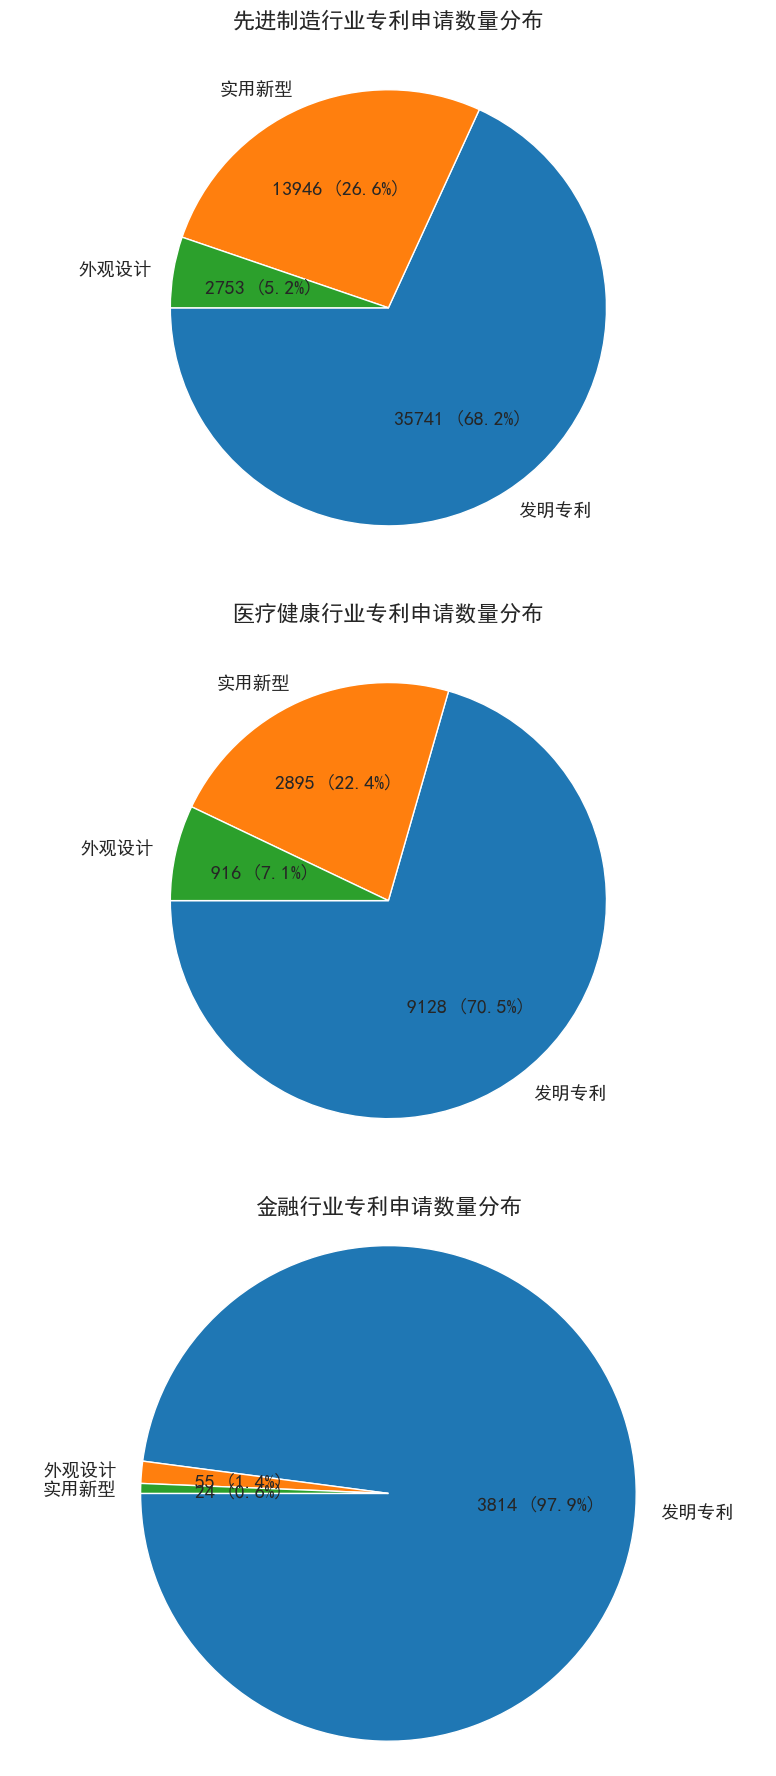

In [542]:
def format_auto_label(pct):
    return '{:.1f}%'.format(pct) if pct >= 3 else '' 

def format_auto_label2(pct, all_vals):
    absolute = int(pct / 100. * all_vals)
    return f'{absolute} ({pct:.1f}%)'
    
fig, axs = plt.subplots(data_3['行业'].nunique(), 1, figsize=(8, 6 * data_3['行业'].nunique()), subplot_kw=dict(aspect='equal'))
#plt.figure(figsize=(10,8))
for ax, industry in zip(axs, data_3['行业'].unique()):
    all_vals = data_3.loc[data_3['行业'] == industry, '申请数量'].sum()
    ax.pie(data_3.loc[data_3['行业'] == industry, '申请数量'], 
            labels=data_3.loc[data_3['行业']==industry,'专利类型'], 
            autopct=lambda pct: format_auto_label2(pct, all_vals),
            colors=plt.cm.tab10.colors, startangle=180)

    ax.set_title(f'{industry}行业专利申请数量分布', fontsize=16)

plt.tight_layout()
plt.axis('equal')
plt.show()

图3：2023年先进制造行业细分行业专利申请占比（饼状图）

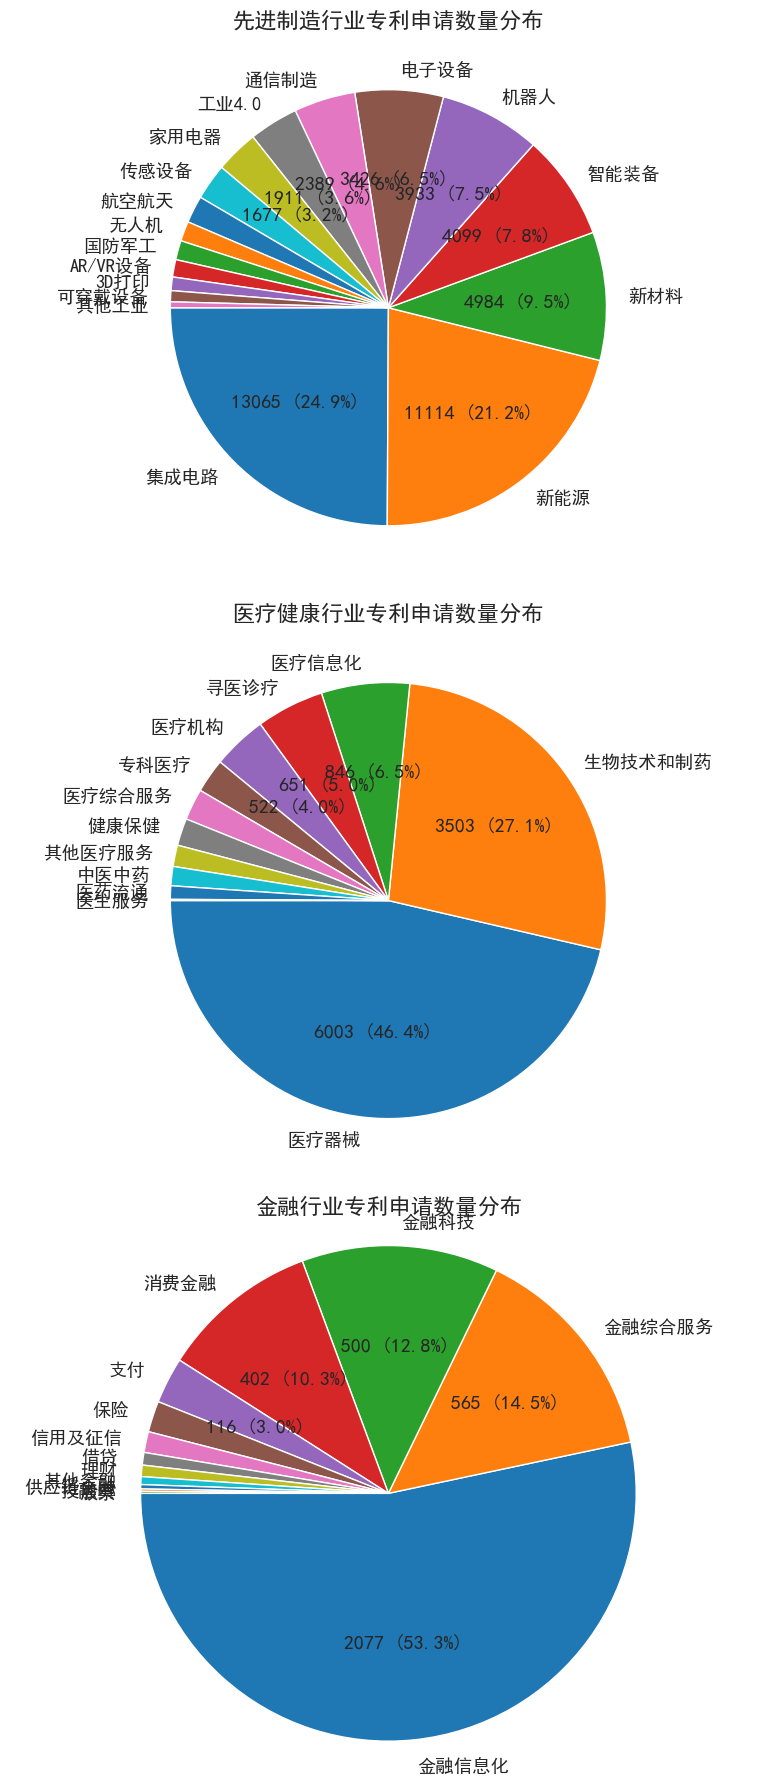

In [598]:
data_31=df_3.groupby(['行业','子行业'],as_index=False).申请号.nunique().rename(columns={'申请号': '申请数量'})
data_31=data_31.groupby('行业', group_keys=False).apply(lambda x: x.sort_values('申请数量', ascending=False))
fig, axs = plt.subplots(data_31['行业'].nunique(), 1, figsize=(8, 6 * data_31['行业'].nunique()), subplot_kw=dict(aspect='equal'))
#plt.figure(figsize=(10,8))

def format_auto_label3(pct, all_vals):
    absolute = int(pct / 100. * all_vals)
    return f'{absolute} ({pct:.1f}%)' if pct >= 3 else '' 
    
for ax, industry in zip(axs, data_31['行业'].unique()):
    all_vals = data_31.loc[data_31['行业'] == industry, '申请数量'].sum()
    ax.pie(data_31.loc[data_31['行业'] == industry, '申请数量'], 
            labels=data_31.loc[data_31['行业']==industry,'子行业'], 
            autopct=lambda pct: format_auto_label3(pct, all_vals),
            colors=plt.cm.tab10.colors, startangle=180)

    ax.set_title(f'{industry}行业专利申请数量分布', fontsize=16)

plt.tight_layout()
plt.axis('equal')
plt.show()

In [600]:
data_31['cum_value']=data_31.groupby('行业').申请数量.transform(lambda x:x.cumsum()/x.sum())
data_31[data_31['cum_value']<=0.8]

,行业,子行业,申请数量,cum_value
16,先进制造,集成电路,13066,0.249156
9,先进制造,新能源,11115,0.461109
8,先进制造,新材料,4985,0.556168
11,先进制造,智能装备,4100,0.634351
12,先进制造,机器人,3933,0.709350
13,先进制造,电子设备,3427,0.774699
23,医疗健康,医疗器械,6004,0.463737
28,医疗健康,生物技术和制药,3503,0.734301
22,医疗健康,医疗信息化,847,0.799722
39,金融,金融信息化,2078,0.533231


In [602]:
data_31.loc[data_31['cum_value']>0.8,'子行业']='其他'
data_32=data_31.groupby(['行业','子行业'],as_index=False).申请数量.sum().groupby('行业', group_keys=False).apply(lambda x: x.sort_values('申请数量', ascending=False))
data_32

,行业,子行业,申请数量
6,先进制造,集成电路,13066
0,先进制造,其他,11815
2,先进制造,新能源,11115
1,先进制造,新材料,4985
3,先进制造,智能装备,4100
4,先进制造,机器人,3933
5,先进制造,电子设备,3427
9,医疗健康,医疗器械,6004
10,医疗健康,生物技术和制药,3503
7,医疗健康,其他,2593


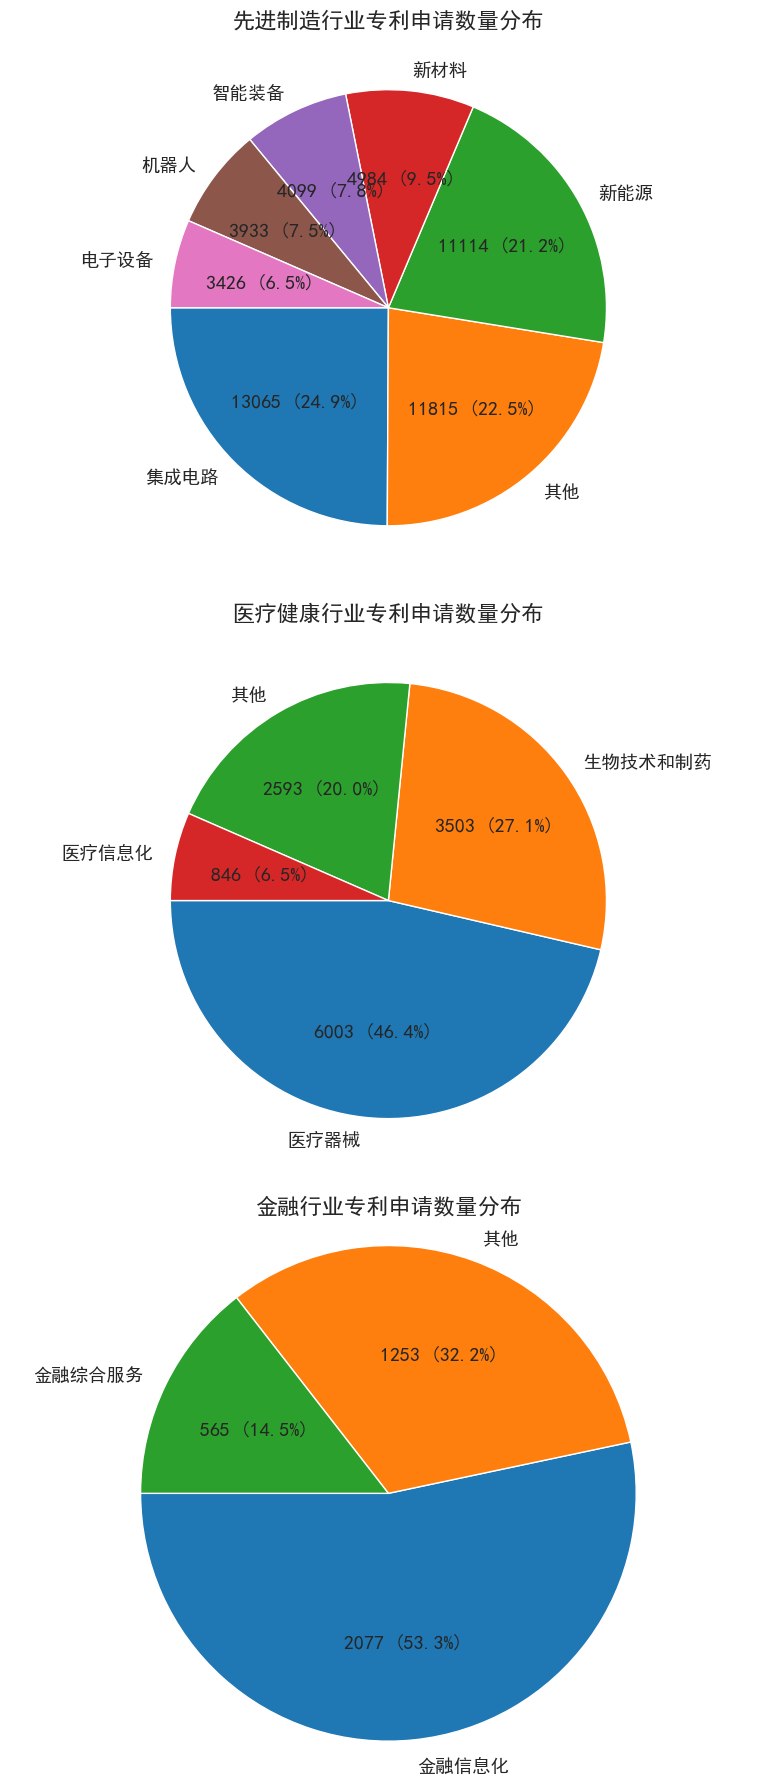

In [596]:
fig, axs = plt.subplots(data_32['行业'].nunique(), 1, figsize=(8, 6 * data_32['行业'].nunique()), subplot_kw=dict(aspect='equal'))
#plt.figure(figsize=(10,8))

   
for ax, industry in zip(axs, data_32['行业'].unique()):
    all_vals = data_32.loc[data_32['行业'] == industry, '申请数量'].sum()
    ax.pie(data_32.loc[data_32['行业'] == industry, '申请数量'], 
            labels=data_32.loc[data_32['行业']==industry,'子行业'], 
            autopct=lambda pct: format_auto_label3(pct, all_vals),
            colors=plt.cm.tab10.colors, startangle=180)

    ax.set_title(f'{industry}行业专利申请数量分布', fontsize=16)

plt.tight_layout()
plt.axis('equal')
plt.show()

In [ ]:
labels_filtered = [label if size / total >= 0.03 else '' for label, size in zip(d1.index, d1.values)]

2010年以来先进制造行业的专利年度申请IPC数量、专利宽度和被引证次数（折线图）

In [481]:
df.columns

Index(['工商全称', '序号', '标题 (中文)', '摘要 (中文)', '申请人', '申请日', '申请号', '首次公开日',
       '公开（公告）号', '专利类型', '专利有效性', '公开国别', 'IPC主分类', 'IPC', '申请人类型', '发明人',
       '发明人数量', '简单同族', '扩展同族', '简单同族个数', '引证专利', '引证科技文献', '引证次数', '被引证次数',
       '引证申请人', '被引证申请人', '申请人数量', '许可次数', '转让次数', '权利要求数量', '当前法律状态',
       'table_name', '公开类型', '行业', '申请年', '首次上市日期', '子行业'],
      dtype='object')

In [ ]:
# ipcs=filter_value['IPC'].str.split(';').explode().str.strip()#split(';', expand=True).stack(),map(lambda x: ';'.join(sorted([y.strip() for y in x])))
# df_patent_invest.loc[mask,'IPC_个数_去重']=ipcs.nunique()#国际专利分类号IPC数量,统计了IPC具体信息个数
# df_patent_invest.loc[mask,'IPC_个数_平均']=df_patent_invest.loc[mask,'IPC_个数_去重']/year_interval(filter_value,'IPC')
# df_patent_invest.loc[mask,'知识宽度'] = 1.0-(ipcs.str.extract('(\w+)/').value_counts(normalize=True)**2).sum()#

In [482]:
ipc_num=df.groupby(['行业','申请年'],as_index=False)['IPC'].apply(lambda x:(x.str.count(';')+1).sum()).rename(columns={'IPC': '申请IPC数量'})#x.str.split(';').explode().count()
ipc_num

,行业,申请年,申请IPC数量
0,先进制造,1994,6.0
1,先进制造,1995,0.0
2,先进制造,1996,3.0
3,先进制造,1998,9.0
4,先进制造,1999,66.0
...,...,...,...
77,金融,2020,22905.0
78,金融,2021,24273.0
79,金融,2022,20520.0
80,金融,2023,13184.0


In [483]:
ipc_ratio=df.groupby(['行业','申请年'],as_index=False)['IPC'].apply(lambda x:1.0-(x.str.split(';').explode().str.strip().str.extract('(\w+)/').value_counts(normalize=True)**2).sum()).rename(columns={'IPC': '专利宽度'})
ipc_ratio#行业的还是先分到企业

,行业,申请年,专利宽度
0,先进制造,1994,0.000000
1,先进制造,1995,1.000000
2,先进制造,1996,0.444444
3,先进制造,1998,0.839506
4,先进制造,1999,0.962810
...,...,...,...
77,金融,2020,0.938691
78,金融,2021,0.940750
79,金融,2022,0.936691
80,金融,2023,0.934107


C:\Users\Prime\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


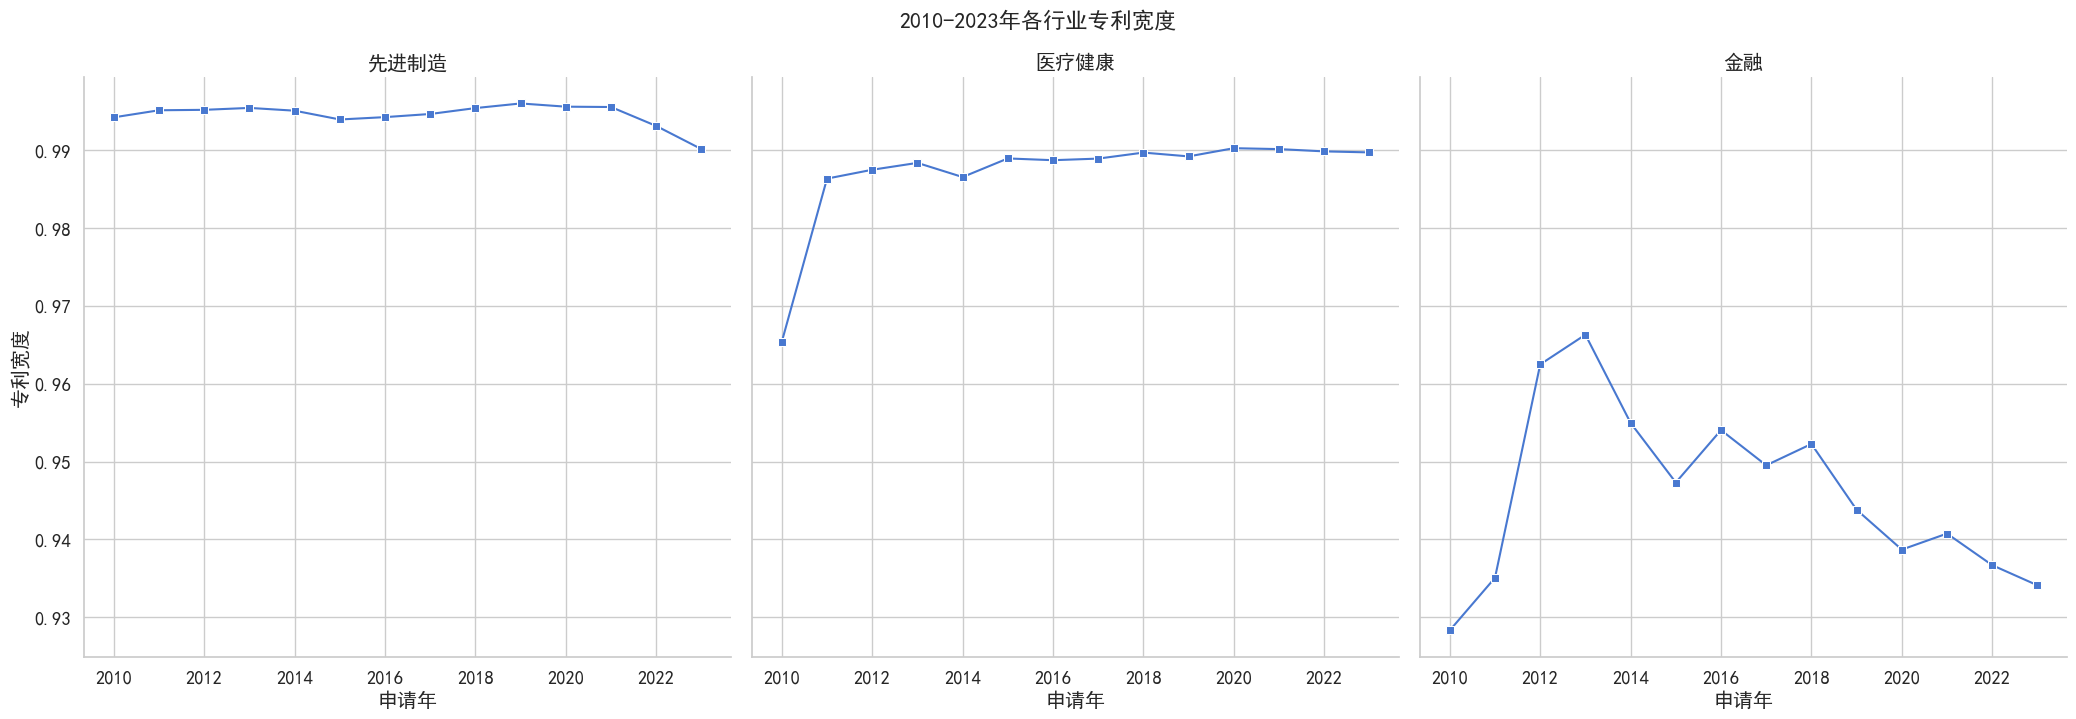

In [484]:
data=ipc_ratio[(ipc_ratio.申请年<2024)&(ipc_ratio.申请年>=2010)].reset_index(drop=True)
sns.set(style='whitegrid', palette='muted',font="SimHei", font_scale=1.2)#
# FacetGrid创建子图
g = sns.FacetGrid(data, col='行业', col_wrap=3, height=7)#, aspect=1.5, sharey=False

g.map_dataframe(sns.lineplot, x='申请年', y='专利宽度', marker='s', linestyle='-', label='专利宽度')

g.set_axis_labels('申请年', '专利宽度')
g.set_titles(col_template="{col_name}", fontsize=14)

plt.suptitle('2010-2023年各行业专利宽度', y=1.03, fontsize=16)
plt.show()

In [507]:
%%time
ipc_ratio_co=df.groupby(['行业','申请年','工商全称'],as_index=False)['IPC'].apply(lambda x:1.0-(x.str.split(';').explode().str.strip().str.extract('(\w+)/').value_counts(normalize=True)**2).sum()).rename(columns={'IPC': '专利宽度'})
ipc_ratio_co

,行业,申请年,工商全称,专利宽度
0,先进制造,1994,珠海格力电器股份有限公司,0.000000
1,先进制造,1995,珠海格力电器股份有限公司,1.000000
2,先进制造,1996,珠海格力电器股份有限公司,1.000000
3,先进制造,1996,贵研铂业股份有限公司,0.444444
4,先进制造,1998,江苏海鸥冷却塔股份有限公司,0.000000
...,...,...,...,...
51755,金融,2024,杭银消费金融股份有限公司,0.859961
51756,金融,2024,浙江惠瀜网络科技有限公司,0.375000
51757,金融,2024,深圳刷宝科技有限公司,0.666667
51758,金融,2024,深圳大数信科技术有限公司,0.625000


C:\Users\Prime\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


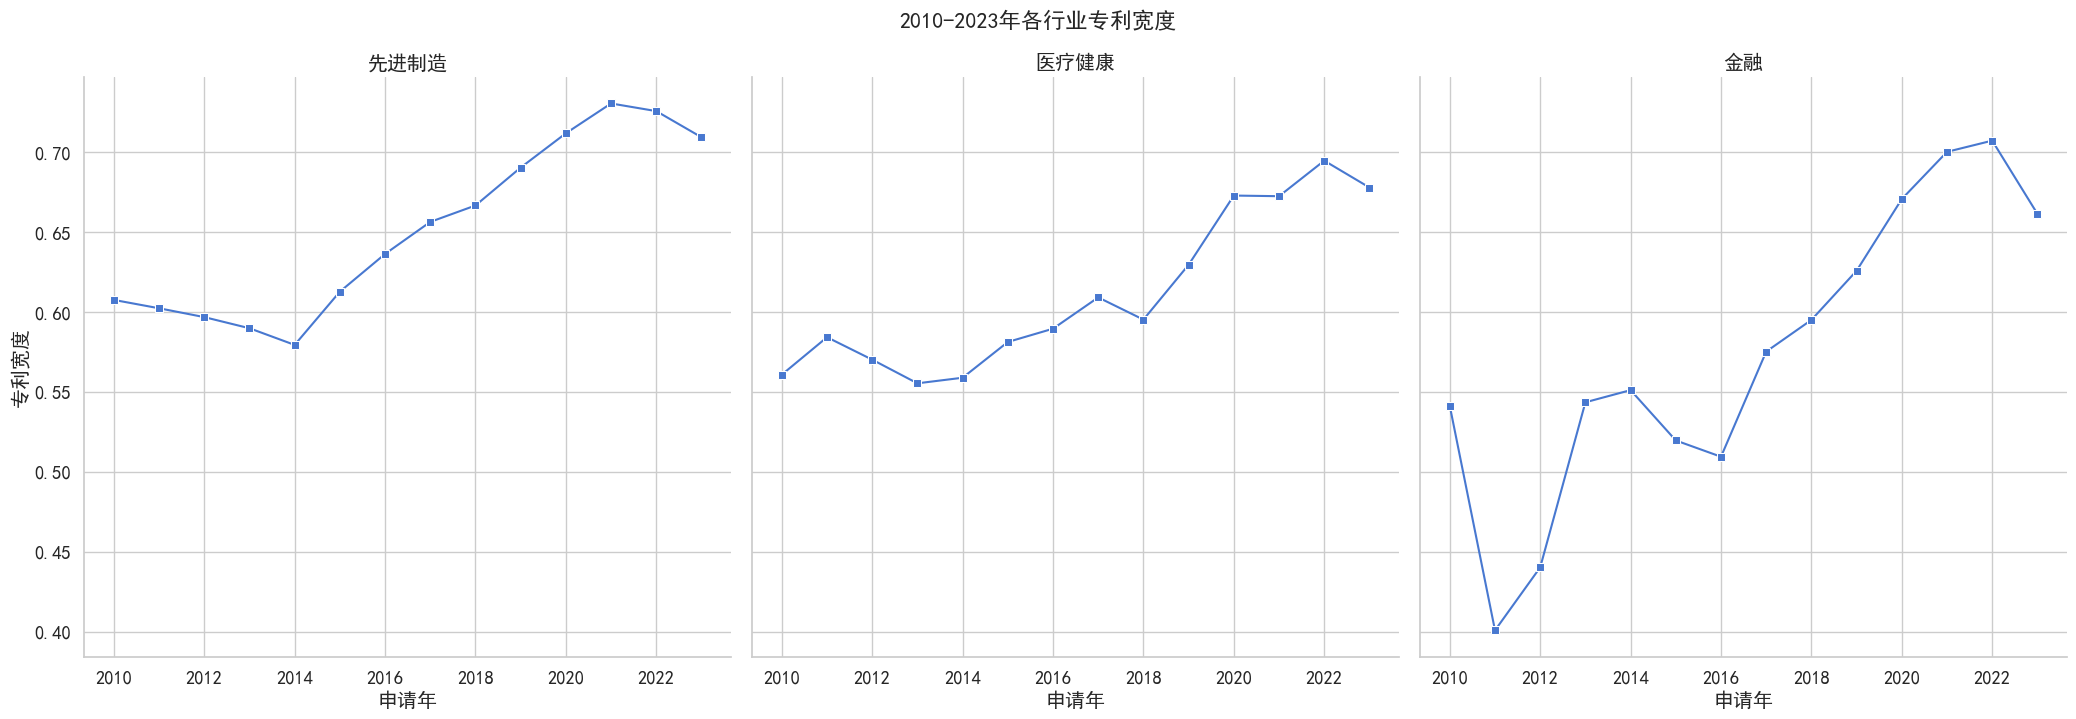

In [512]:
ipc_ratio=ipc_ratio_co.groupby(['行业','申请年'],as_index=False)['专利宽度'].mean()
data=ipc_ratio[(ipc_ratio.申请年<2024)&(ipc_ratio.申请年>=2010)].reset_index(drop=True)

sns.set(style='whitegrid', palette='muted',font="SimHei", font_scale=1.2)#
# FacetGrid创建子图
g = sns.FacetGrid(data, col='行业', col_wrap=3, height=7)#, aspect=1.5, sharey=False

g.map_dataframe(sns.lineplot, x='申请年', y='专利宽度', marker='s', linestyle='-', label='专利宽度')

g.set_axis_labels('申请年', '专利宽度')
g.set_titles(col_template="{col_name}", fontsize=14)

plt.suptitle('2010-2023年各行业专利宽度', y=1.03, fontsize=16)
plt.show()

In [515]:
industry_year_patent=pd.merge(industry_year_patent, ipc_num, on=['行业', '申请年'],how='left')
industry_year_patent=pd.merge(industry_year_patent, ipc_ratio, on=['行业', '申请年'],how='left')
industry_year_patent

,行业,申请年,申请数量,授权数量,申请IPC数量,被引证次数,简单同族个数,有效权利要求数量,发明专利数量,专利宽度
0,先进制造,1994,4,0,6.0,0,4,NaN,1,0.000000
1,先进制造,1995,1,0,0.0,0,1,NaN,0,1.000000
2,先进制造,1996,5,0,3.0,0,6,NaN,1,0.722222
3,先进制造,1998,4,0,9.0,5.0,7,NaN,3,0.406250
4,先进制造,1999,32,0,66.0,81.0,43,NaN,16,0.620639
...,...,...,...,...,...,...,...,...,...,...
77,金融,2020,6747,4007,22905.0,13149.0,12972,38119.0,7793,0.670742
78,金融,2021,7449,3090,24273.0,3893.0,11726,28915.0,8047,0.700272
79,金融,2022,6675,1619,20520.0,1162.0,8284,11117.0,6545,0.707279
80,金融,2023,3895,798,13184.0,234.0,4957,7086.0,4167,0.661472


C:\Users\Prime\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


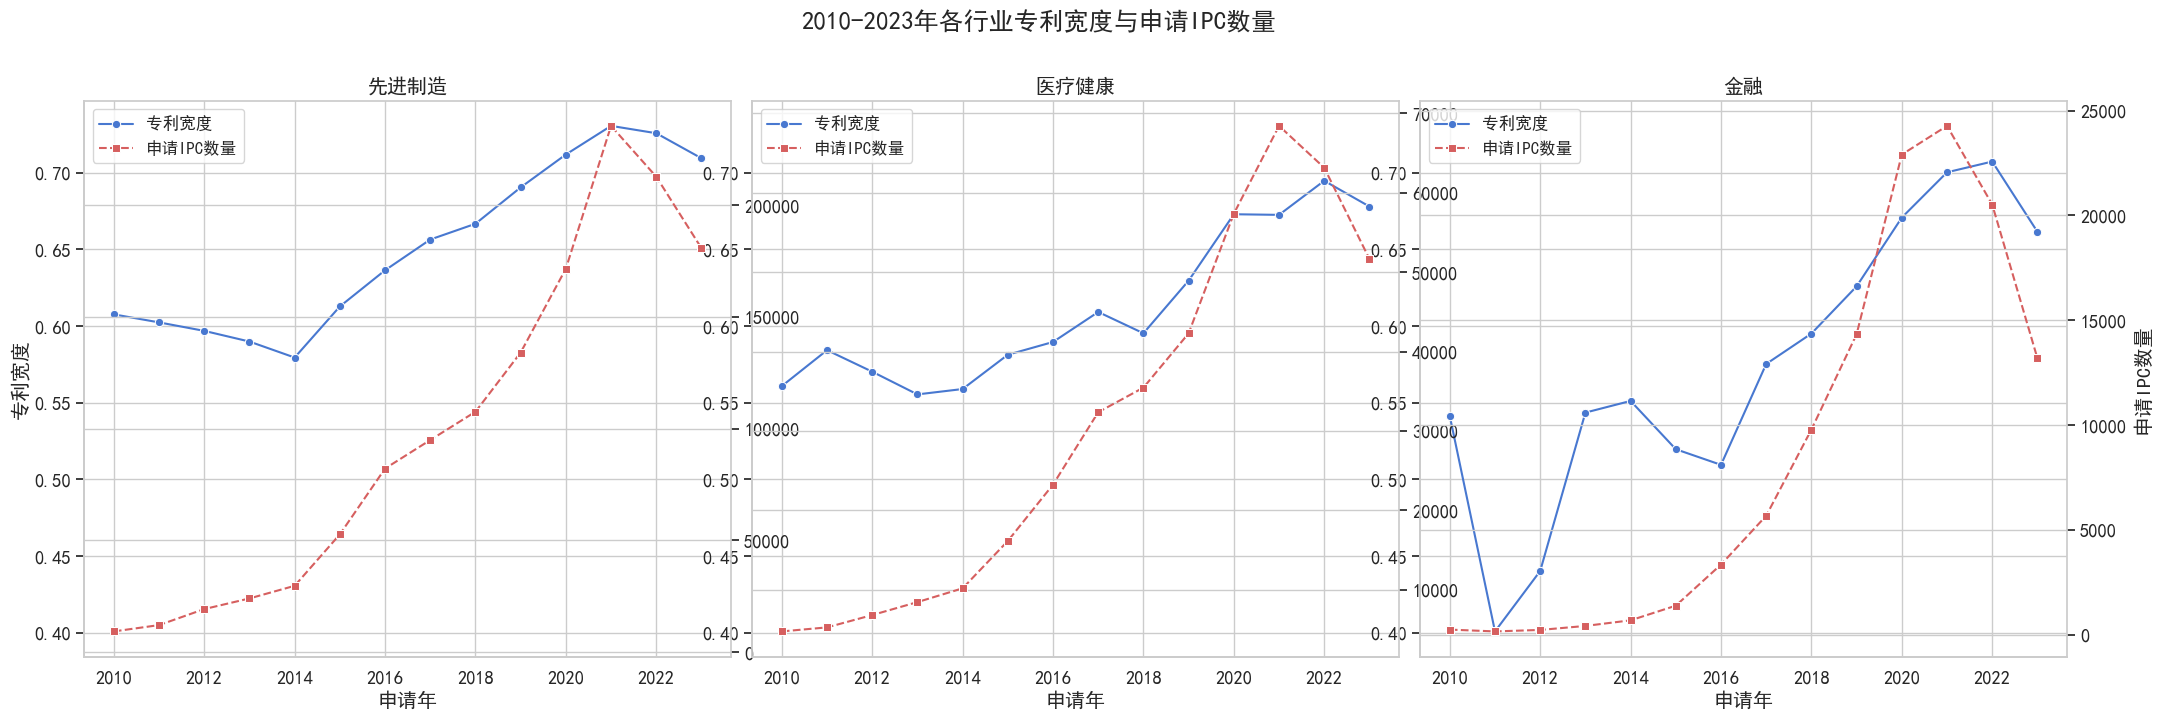

In [516]:
data = industry_year_patent[(industry_year_patent.申请年 < 2024) & (industry_year_patent.申请年 >= 2010)].reset_index(drop=True)

# 设置Seaborn风格
sns.set(style='whitegrid', palette='muted',font="SimHei", font_scale=1.2)

# FacetGrid创建子图
g = sns.FacetGrid(data, col='行业', col_wrap=3, height=7)#, sharey=False

g.map_dataframe(sns.lineplot, x='申请年', y='专利宽度', marker='o', linestyle='-', label='专利宽度')
#g.set_axis_labels('申请年', '专利宽度', fontsize=14)

# 设置子图标题字体大小
g.set_titles(col_template="{col_name}", fontsize=16)

for i,ax in enumerate(g.axes.flatten()):
    # 创建第二个y轴
    ax2 = ax.twinx()
    industry = ax.get_title()  # 获取当前子图的行业

    sns.lineplot(data= data[data['行业'] == industry] , x='申请年', y='申请IPC数量', marker='s', linestyle='--', ax=ax2, color='r', label='申请IPC数量')
    # ax.tick_params(labelsize=12)
    # ax2.tick_params(labelsize=12)
 
    ax2.yaxis.tick_right()
    #ax.yaxis.set_ticks([])
    if i<2:
        ax2.set_ylabel('')

    handles1, labels1 = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(handles=handles1 + handles2, labels=labels1 + labels2, loc='upper left', fontsize=12)


plt.subplots_adjust(top=0.9)
#g.set_axis_labels('申请年', '利宽度')
g.fig.suptitle('2010-2023年各行业专利宽度与申请IPC数量', y=1.03, fontsize=18)

# 显示图表
plt.show()

In [487]:
#  citing=filter_value['引证专利'].str.split(';').explode().str.strip()
industry_year_patent=pd.merge(industry_year_patent, df.groupby(['行业','申请年'],as_index=False)['被引证次数'].sum(), on=['行业', '申请年'],how='left')

C:\Users\Prime\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Prime\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


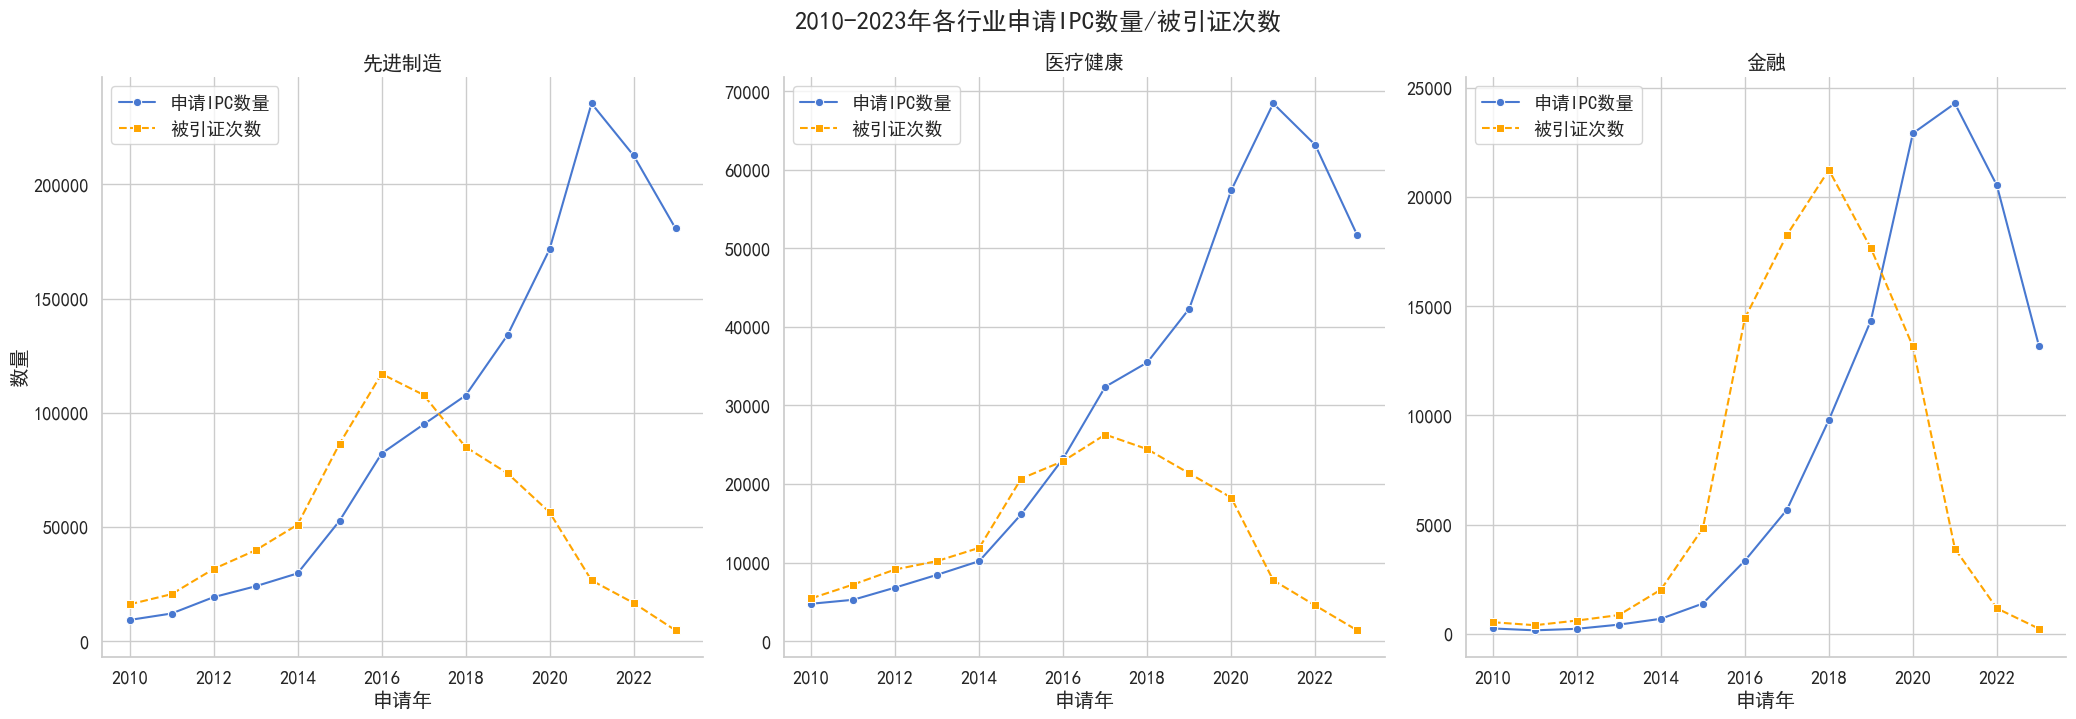

In [604]:
data=industry_year_patent[(industry_year_patent.申请年<2024)&(industry_year_patent.申请年>=2010)].reset_index(drop=True)
#set_plot_style()
sns.set(style='whitegrid', palette='muted',font="SimHei", font_scale=1.2) 
# FacetGrid创建子图
g = sns.FacetGrid(data, col='行业', col_wrap=3, height=7,  sharey=False)#aspect=1.5,

g.map_dataframe(sns.lineplot, x='申请年', y='申请IPC数量', marker='o', linestyle='-', label='申请IPC数量')
g.map_dataframe(sns.lineplot, x='申请年', y='被引证次数', marker='s', linestyle='--', label='被引证次数',color='orange')

for ax in g.axes.flat:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[:2], labels=['申请IPC数量', '被引证次数'])

# 设置标题和标签
g.set_axis_labels('申请年', '数量')
g.set_titles(col_template="{col_name}", fontsize=14)

plt.suptitle('2010-2023年各行业申请IPC数量/被引证次数', y=1.03, fontsize=18)
plt.show()

2023年三大行业专利年度申请IPC数量（饼状图）

In [489]:
df_3.shape

(77441, 37)

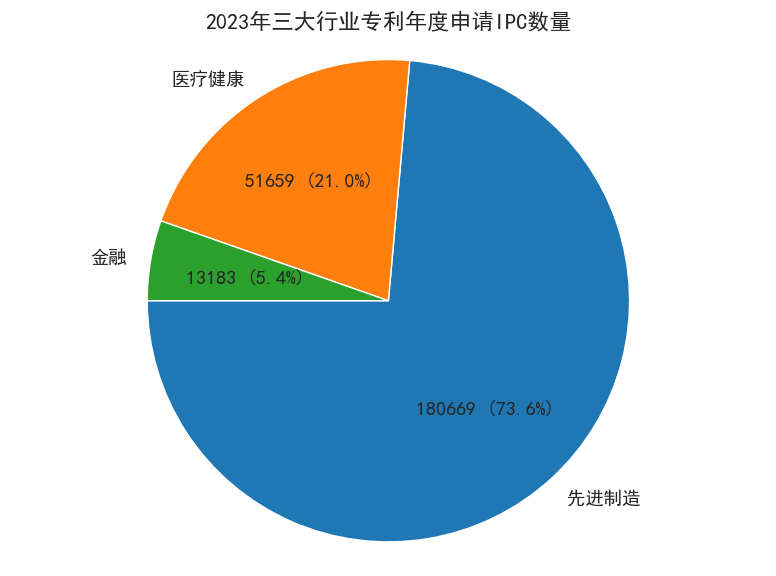

In [490]:
data=df_3.groupby(['行业'])['IPC'].apply(lambda x:(x.str.count(';')+1).sum()).rename('申请IPC数量')
all_vals=data.sum()
plt.figure(figsize=(8, 6))
data.plot.pie(colors=plt.cm.tab10.colors, startangle=180,autopct=lambda pct: format_auto_label2(pct, all_vals))

plt.title('2023年三大行业专利年度申请IPC数量', fontsize=16)
plt.gca().set_ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [491]:
industry_year_patent.loc[industry_year_patent.申请年==2023,'申请IPC数量'],data/data.sum()

(28    180670.0
 58     51659.0
 80     13184.0
 Name: 申请IPC数量, dtype: float64,
 行业
 先进制造    0.735888
 医疗健康    0.210412
 金融      0.053700
 Name: 申请IPC数量, dtype: float64)

In [492]:
mask_1=(industry_year_patent.申请年<2024)&(industry_year_patent.申请年>=2010)
mask_1.sum()

42

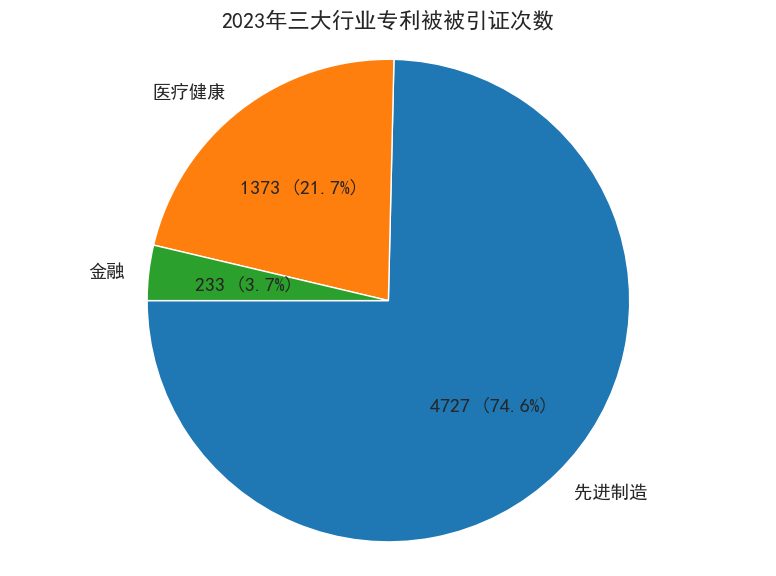

In [493]:
#2023年三大行业专利被印证次数（饼状图）
data=industry_year_patent[industry_year_patent.申请年==2023].set_index('行业')['被引证次数']
all_vals=data.sum()
plt.figure(figsize=(8, 6))
data.plot.pie(colors=plt.cm.tab10.colors, startangle=180,autopct=lambda pct: format_auto_label2(pct, all_vals))

plt.title('2023年三大行业专利被被引证次数', fontsize=16)
plt.gca().set_ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.show()

<Axes: title={'center': '2023年三大行业专利宽度'}, xlabel='行业'>

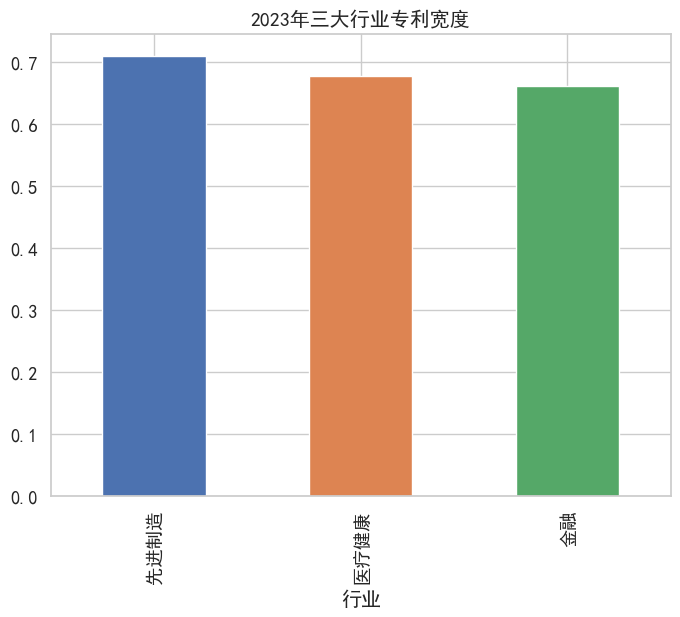

In [517]:
#2023年三大行业专利宽度（柱状图）
data=industry_year_patent[industry_year_patent.申请年==2023].set_index('行业')['专利宽度']

data.plot.bar(title='2023年三大行业专利宽度',figsize=(8, 6), color=colors)

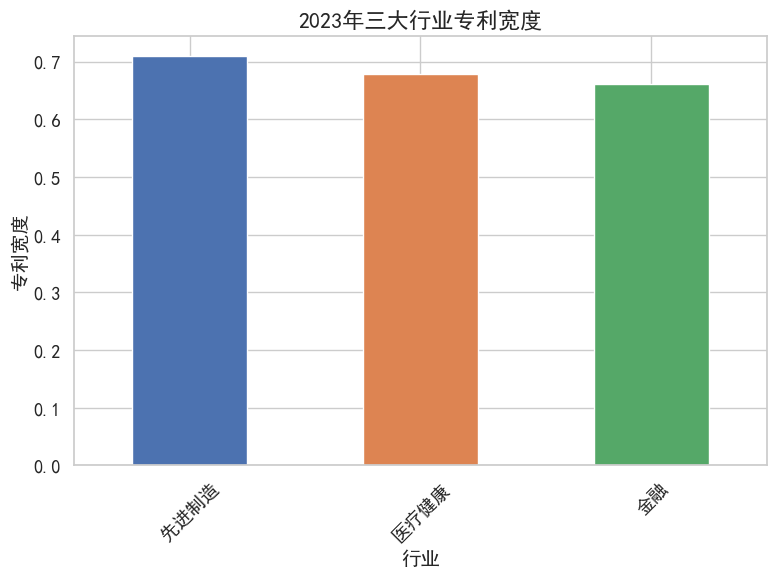

In [518]:
plt.figure(figsize=(8, 6))
data.plot.bar(color=colors)

plt.title('2023年三大行业专利宽度', fontsize=16)
plt.xlabel('行业', fontsize=14)
plt.ylabel('专利宽度', fontsize=14)
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

2010年以来先进制造行业的公开发明专利数量、有效权利要求数量和同族专利数量

In [496]:
df['专利有效性'].value_counts()

专利有效性
有效     470056
审中     162149
失效     126177
未确认         2
Name: count, dtype: int64

In [497]:
df['当前法律状态'].value_counts()

当前法律状态
授权      469974
实质审查    149730
驳回       47387
未缴年费     43025
撤回       20180
公开       12419
期限届满     10283
避重放弃      4075
放弃         892
全部无效       236
权利终止        98
部分无效        82
暂缺           2
申请终止         1
Name: count, dtype: int64

In [498]:
df['公开类型'].value_counts()#这部分数据缺失

公开类型
发明申请        295531
实用新型        190165
发明授权        133686
外观设计         49677
修正或者更正专利        86
译文               1
Name: count, dtype: int64

In [500]:
df['专利类型'].value_counts()#发明申请+发明授权

专利类型
发明申请    343562
实用新型    217396
发明授权    140876
外观设计     56550
Name: count, dtype: int64

In [499]:
df.columns#公开类型

Index(['工商全称', '序号', '标题 (中文)', '摘要 (中文)', '申请人', '申请日', '申请号', '首次公开日',
       '公开（公告）号', '专利类型', '专利有效性', '公开国别', 'IPC主分类', 'IPC', '申请人类型', '发明人',
       '发明人数量', '简单同族', '扩展同族', '简单同族个数', '引证专利', '引证科技文献', '引证次数', '被引证次数',
       '引证申请人', '被引证申请人', '申请人数量', '许可次数', '转让次数', '权利要求数量', '当前法律状态',
       'table_name', '公开类型', '行业', '申请年', '首次上市日期', '子行业'],
      dtype='object')

In [501]:
df4=df.groupby(['行业','申请年'],as_index=False)['简单同族个数'].sum()
df5=df[df.专利有效性=='有效'].groupby(['行业','申请年'],as_index=False)['权利要求数量'].sum().rename(columns={'权利要求数量':'有效权利要求数量'})
df6=df.groupby(['行业','申请年'],as_index=False)['专利类型'].apply(lambda x:x.isin(['发明授权','发明申请']).sum()).rename(columns={'专利类型':'发明专利数量'})#公开发明专利数量,当前法律状态:

industry_year_patent=pd.merge(industry_year_patent, df4, on=['行业', '申请年'],how='left')
industry_year_patent=pd.merge(industry_year_patent, df5, on=['行业', '申请年'],how='left')
industry_year_patent=pd.merge(industry_year_patent, df6, on=['行业', '申请年'],how='left')
industry_year_patent

,行业,申请年,申请数量,授权数量,申请IPC数量,专利宽度,被引证次数,简单同族个数,有效权利要求数量,发明专利数量
0,先进制造,1994,4,0,6.0,0.000000,0,4,NaN,1
1,先进制造,1995,1,0,0.0,1.000000,0,1,NaN,0
2,先进制造,1996,5,0,3.0,0.444444,0,6,NaN,1
3,先进制造,1998,4,0,9.0,0.839506,5.0,7,NaN,3
4,先进制造,1999,32,0,66.0,0.962810,81.0,43,NaN,16
...,...,...,...,...,...,...,...,...,...,...
77,金融,2020,6747,4007,22905.0,0.938691,13149.0,12972,38119.0,7793
78,金融,2021,7449,3090,24273.0,0.940750,3893.0,11726,28915.0,8047
79,金融,2022,6675,1619,20520.0,0.936691,1162.0,8284,11117.0,6545
80,金融,2023,3895,798,13184.0,0.934107,234.0,4957,7086.0,4167


C:\Users\Prime\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Prime\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


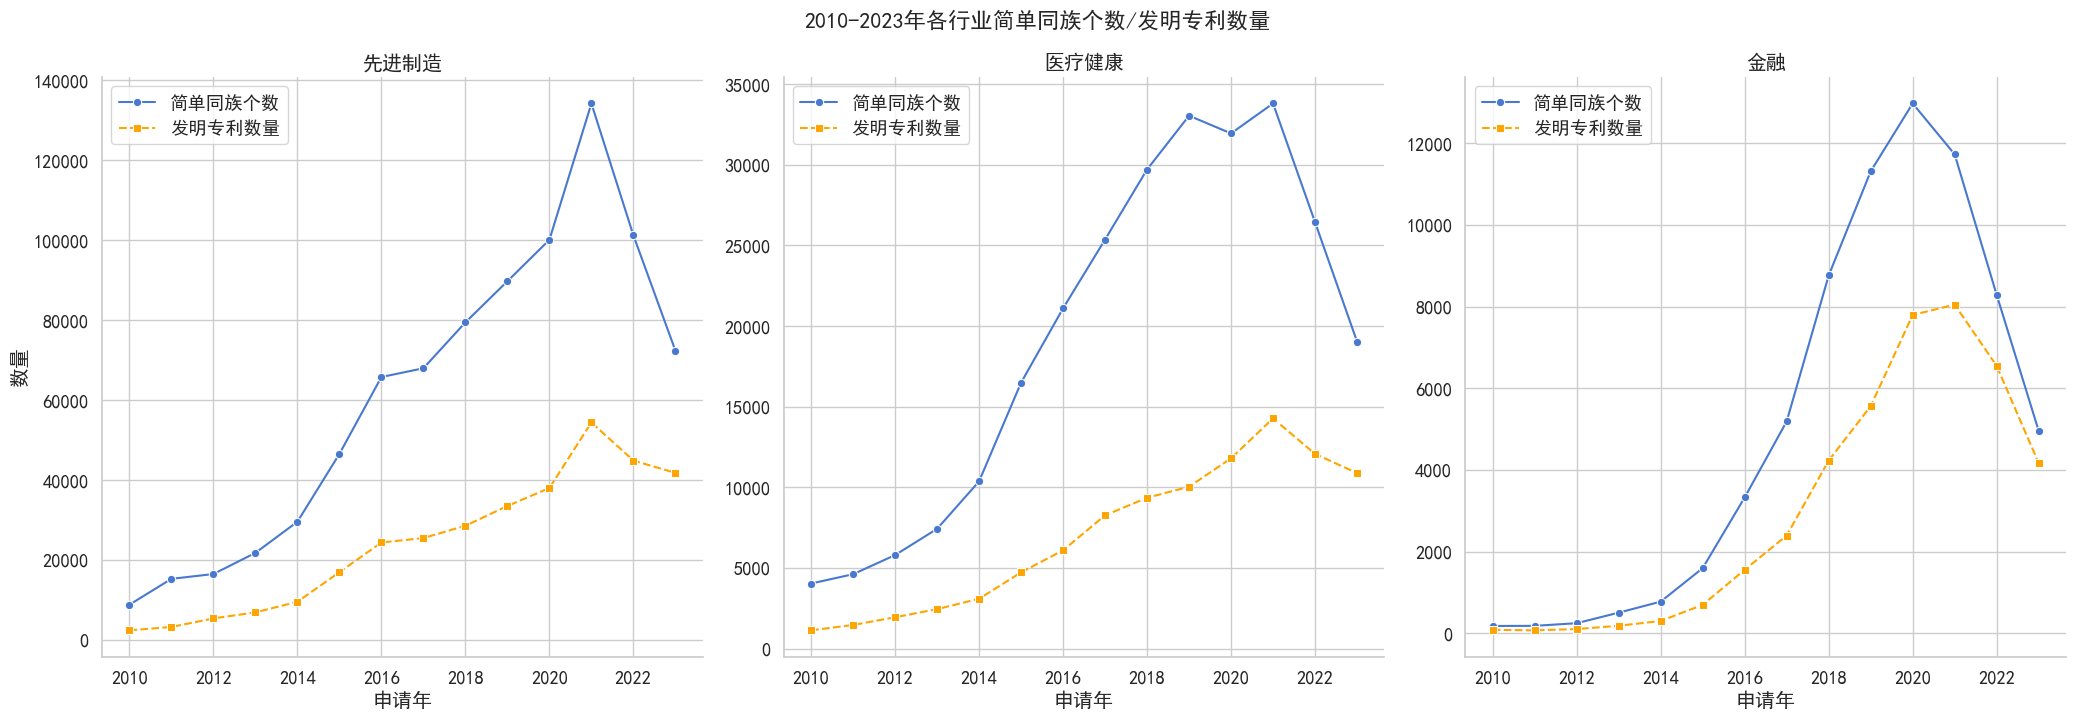

In [502]:
data=industry_year_patent[mask_1].reset_index(drop=True)
#set_plot_style()
sns.set(style='whitegrid', palette='muted',font="SimHei", font_scale=1.2) 
# FacetGrid创建子图
g = sns.FacetGrid(data, col='行业', col_wrap=3, height=7,  sharey=False)#aspect=1.5,

g.map_dataframe(sns.lineplot, x='申请年', y='简单同族个数', marker='o', linestyle='-', label='简单同族个数')
g.map_dataframe(sns.lineplot, x='申请年', y='发明专利数量', marker='s', linestyle='--', label='发明专利数量',color='orange')

for ax in g.axes.flat:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[:2], labels=['简单同族个数','发明专利数量'])

# 设置标题和标签
g.set_axis_labels('申请年', '数量')
g.set_titles(col_template="{col_name}", fontsize=14)

plt.suptitle('2010-2023年各行业简单同族个数/发明专利数量', y=1.03, fontsize=16)
plt.show()

C:\Users\Prime\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


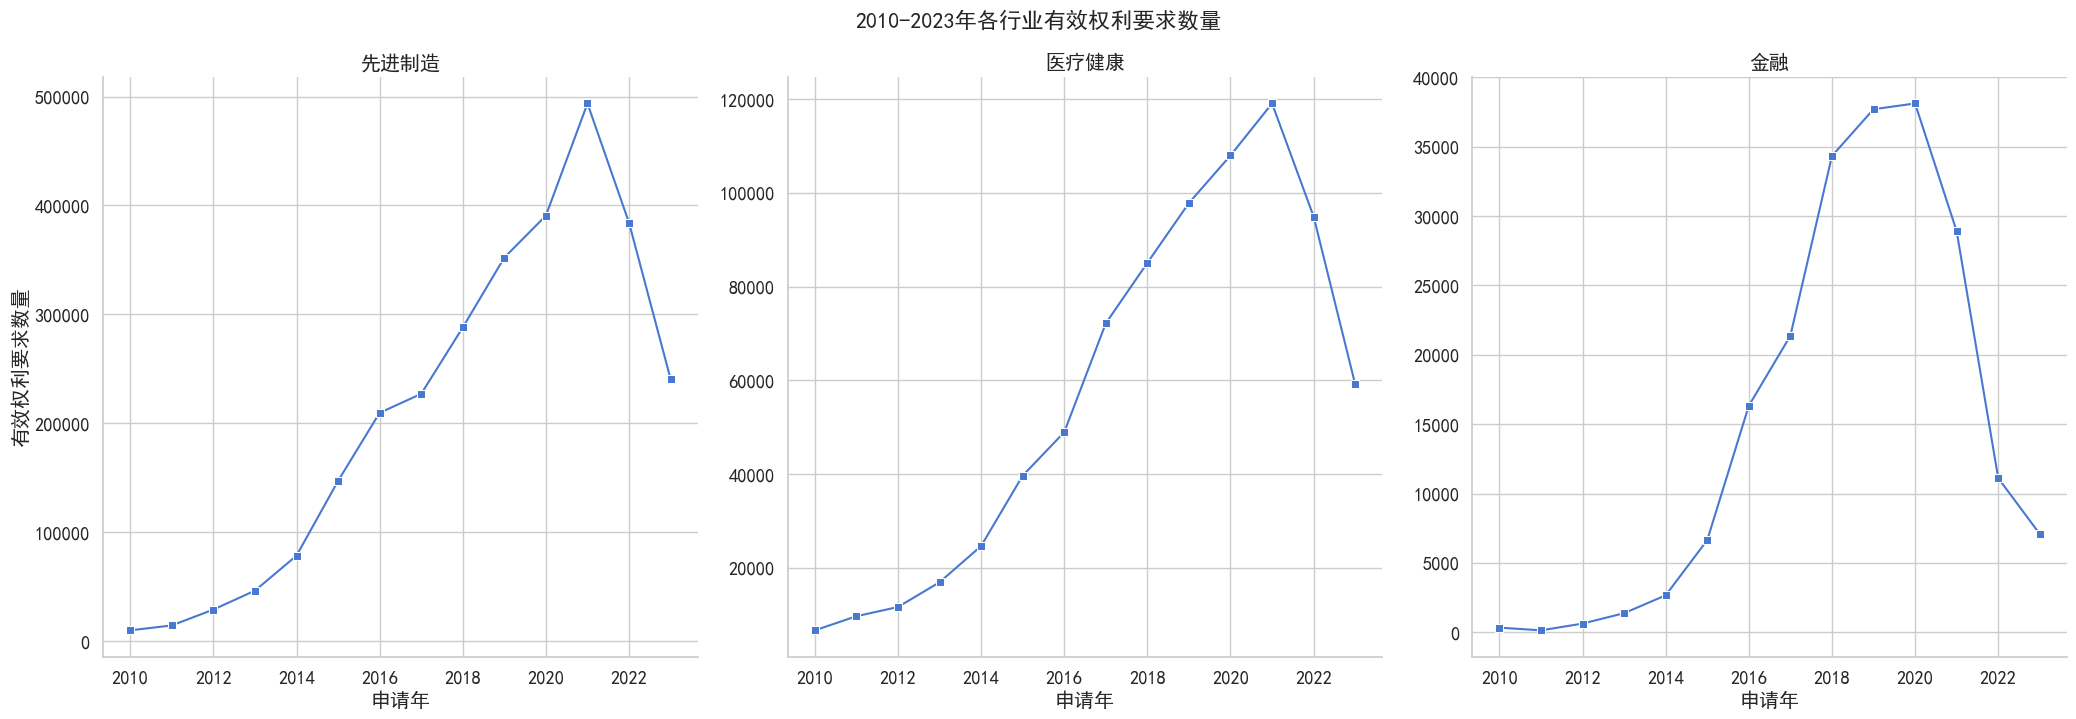

In [503]:
sns.set(style='whitegrid', palette='muted',font="SimHei", font_scale=1.2)#
# FacetGrid创建子图
g = sns.FacetGrid(data, col='行业', col_wrap=3, height=7, sharey=False)#, aspect=1.5, sharey=False

g.map_dataframe(sns.lineplot, x='申请年', y='有效权利要求数量', marker='s', linestyle='-', label='有效权利要求数量')

g.set_axis_labels('申请年', '有效权利要求数量')
g.set_titles(col_template="{col_name}", fontsize=14)

plt.suptitle('2010-2023年各行业有效权利要求数量', y=1.03, fontsize=16)
plt.show()

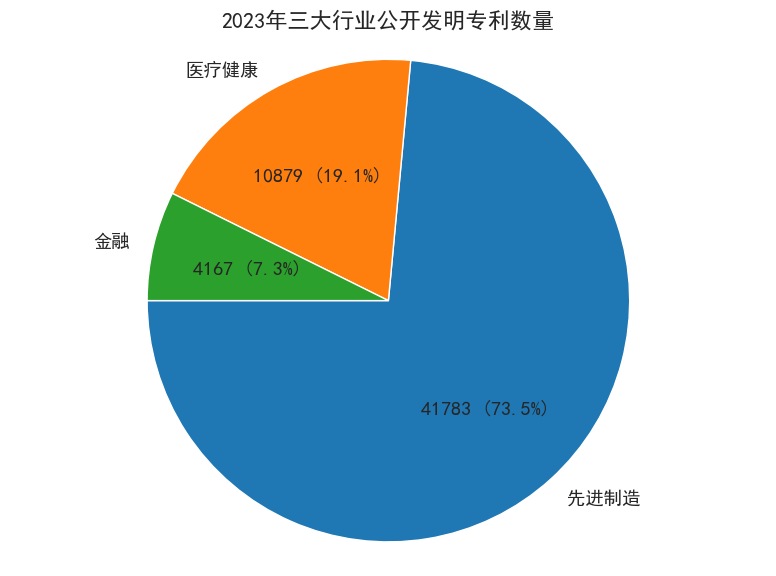

In [504]:
#2023年三大行业公开发明专利数量（饼状图）

data=industry_year_patent[industry_year_patent.申请年==2023].set_index('行业')['发明专利数量']
all_vals=data.sum()
plt.figure(figsize=(8, 6))
data.plot.pie(colors=plt.cm.tab10.colors, startangle=180,autopct=lambda pct: format_auto_label2(pct, all_vals))

plt.title('2023年三大行业公开发明专利数量', fontsize=16)
plt.gca().set_ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.show()

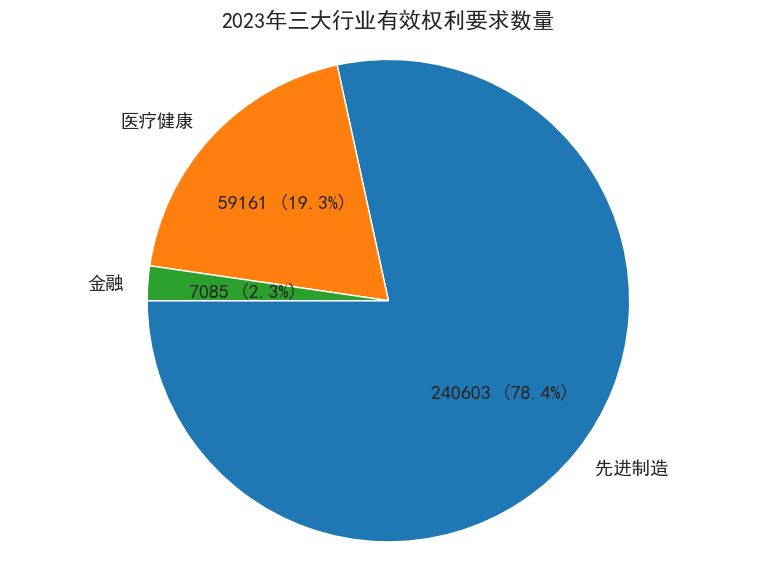

In [505]:
#2023年三大行业专利有效权利要求数量（饼状图）
data=industry_year_patent[industry_year_patent.申请年==2023].set_index('行业')['有效权利要求数量']
all_vals=data.sum()
plt.figure(figsize=(8, 6))
data.plot.pie(colors=plt.cm.tab10.colors, startangle=180,autopct=lambda pct: format_auto_label2(pct, all_vals))

plt.title('2023年三大行业有效权利要求数量', fontsize=16)
plt.gca().set_ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.show()

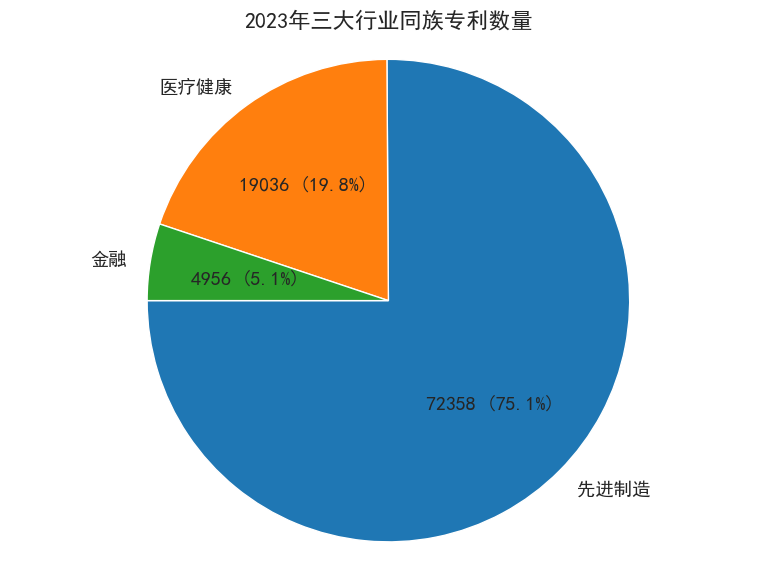

In [506]:
#2023年三大行业同族专利数量（饼状图）
data=industry_year_patent[industry_year_patent.申请年==2023].set_index('行业')['简单同族个数']
all_vals=data.sum()
plt.figure(figsize=(8, 6))
data.plot.pie(colors=plt.cm.tab10.colors, startangle=180,autopct=lambda pct: format_auto_label2(pct, all_vals))

plt.title('2023年三大行业同族专利数量', fontsize=16)
plt.gca().set_ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [520]:
industry_year_patent.to_excel('data\industry_year_patent.xlsx')

In [525]:
industry_year_patent_1=industry_year_patent.copy()
industry_year_patent_1['行业']=industry_year_patent_1['行业'].map({'先进制造':1,'医疗健康':2,'金融':3})
industry_year_patent_1.corr()

,行业,申请年,申请数量,授权数量,申请IPC数量,被引证次数,简单同族个数,有效权利要求数量,发明专利数量,专利宽度
行业,1.000000,0.181965,-0.375315,-0.368780,-0.348918,-0.364127,-0.384069,-0.446724,-0.349739,-0.056477
申请年,0.181965,1.000000,0.507370,0.485056,0.516609,0.369290,0.517012,0.479928,0.536243,0.225668
申请数量,-0.375315,0.507370,1.000000,0.989305,0.993572,0.596667,0.987624,0.984733,0.996515,0.284851
授权数量,-0.368780,0.485056,0.989305,1.000000,0.977763,0.630150,0.994019,0.999090,0.982640,0.273494
申请IPC数量,-0.348918,0.516609,0.993572,0.977763,1.000000,0.517710,0.970976,0.971574,0.992780,0.291051
被引证次数,-0.364127,0.369290,0.596667,0.630150,0.517710,1.000000,0.680611,0.618346,0.596838,0.158513
简单同族个数,-0.384069,0.517012,0.987624,0.994019,0.970976,0.680611,1.000000,0.993503,0.984377,0.280236
有效权利要求数量,-0.446724,0.479928,0.984733,0.999090,0.971574,0.618346,0.993503,1.000000,0.979368,0.498111
发明专利数量,-0.349739,0.536243,0.996515,0.982640,0.992780,0.596838,0.984377,0.979368,1.000000,0.292585
专利宽度,-0.056477,0.225668,0.284851,0.273494,0.291051,0.158513,0.280236,0.498111,0.292585,1.000000
